<a href="https://colab.research.google.com/github/varunjoshua/ola-churn-analysis/blob/main/OLA_Business_Case_Ensemble_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: OLA - Driver Attrition**

# **Business Problem:**

Ola is a leading ride-sharing platform, aiming to provide reliable, affordable, and convenient urban transportation for everyone.

To succeed at its business Ola spends a great deal of money and resources on acquiring drivers. Recruiting and retaining drivers however is tough battle for the company. Churn among drivers is high and it's very easy for drivers to quit and join the competitor for better rates.

As the sector grows and competition stiffens, acquisition costs increase and the high churn could become a bigger problem. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones. Ensuring driver
loyalty and reducing attrition are crucial to the company's operation and success.

# **Task:**

* Analyze the given driver data to reveal patterns in driver behavior, performance, and satisfaction and provide recommendations and proactive measures to help the business prevent attrition.

* Apply data science and ensemble learning to predict whether a driver will be leaving the company using which the business can identify drivers who are likely to churn and take necessary action.


# **Importing Data & Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

--2024-10-25 02:24:52--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.181, 13.224.9.129, 13.224.9.24, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127673 (1.1M) [text/plain]
Saving to: ‘ola_driver_scaler.csv’

ola_driver_scaler.c 100%[===================>]   1.08M  --.-KB/s    in 0.05s   

2024-10-25 02:24:52 (21.9 MB/s) - ‘ola_driver_scaler.csv’ saved [1127673/1127673]



In [ ]:
df = pd.read_csv('ola_driver_scaler.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# **Data Overview**

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df['Driver_ID'].nunique()

2381

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Driver_ID'].nunique()

2381

## **Column Profile, Explanation & Treatment:**

1. The **Unnamed:0** column is a redundant index that does not provide any information necessary to the task. The column will be dropped.

2. **MMMM-YY** contains reporting dates which appear to be in MM/DD/YY format and recorded on the 1st of each month. The reporting dates may not provide critical information on driver behaviour, performance, satisfaction or term of service and can be dropped but may have information required for aggregation after which it can be dropped.

3. **Driver_ID** contains unique IDs allocated to drivers. There are multiple occurances of the Driver ID in this column. For analysis we will aggregate the data by Driver_ID.

4. The driver's age is stored in the **Age** column in float64 format. The column will help in making age based comparison of churn and other features.

5. The driver's gender is given in the **Gender** column with 0 representing male and 1 representing female drivers. The data is in float64 format and will be converted to category type for efficiency. The column will help in making age based comparison of churn and other features.

6. The **City** column contain the City code representing the city the driver operates in. We will treat this as a categorical column for location based analysis.

7. **Education_Level** categorizes the driver's education level into 0 for 10+, 1 for 12+, and 2 for graduate. The information will be useful in analysing driver behaviour. The information is categorical and ordinal in nature.  

8. The **Income** column contains the driver's average monthly income. The data is numerical and will be critical in understanding driver behaviour and performance and impact on churn.

9. The **'Date Of Joining'** tells us when the driver joined Ola. The joining date will help calculate the driver's service term. The column will be converted to Date Time format for processing.

10. The driver's last working date at Ola is given in the **LastWorkingDate** column. Effectively the column indicated whether a driver has quit Ola or not. and will help us calculate the driver's service term. The column will be converted to Date Time format for processing.

11. **Joining Designation** provides the designation of the driver at the time they were onboarded. Though the data is cateogrical, the information is ordinal and doesn't require conversion.

12. The'**Grade** in the Grade column is assigned to the driver at the reporting time denoting performance or other metrics. The data is categorical but ordinal and can be retained in int format.

13. The total monetary value (business) a driver brings in a month is given in the **'Total Business Value'** column. Negative values might be a result of cancellations, refunds, or other financial adjustments. The data is a strong indicator of the driver's performance.

14. **Quarterly Rating** contains rating assigned to drivers on a quarterly basis. Ratings range from 1 to 5, with 5 being the best. No data type conversion is required.

## **Column Transformation**

In [ ]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
#Converting Date columns to Date Time type

df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], errors = 'coerce', format='%d/%m/%y')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors = 'coerce', format='%d/%m/%y')
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], errors = 'coerce', format='%m/%d/%y')

In [ ]:
df['MMM-YY'] = df['MMM-YY'].dt.strftime('%d/%m/%Y')

In [ ]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%d/%m/%Y')

In [ ]:
# Converting discreet categorical columns to categorical type:

discrt_cols = ['Driver_ID', 'City', 'Gender' ]

df[discrt_cols] = df[discrt_cols].astype('category')

In [ ]:
df['Gender'] = df['Gender'].map({0.0: 0, 1.0: 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  category      
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  category      
 5   City                  19104 non-null  category      
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

# **Data Cleaning & Feature Engineering**

## **Creating Target Variable**

Using the Last Working Day Column we can identify drivers who have quit Ola. The information will be captured in the column Churn where drivers who have quit the company will be labeled as 1 and those who haven't will be labeled 0.

In [ ]:
df['Churn'] = df['LastWorkingDate'].apply(lambda x: 1 if pd.notnull(x) else 0)

## **Calculating Tenure**

In [ ]:
df['MMM-YY'].min(), df['MMM-YY'].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2020-12-01 00:00:00'))

In [ ]:
df['Dateofjoining'].min(), df['Dateofjoining'].max()

(Timestamp('2013-01-04 00:00:00'), Timestamp('2020-12-28 00:00:00'))

In [ ]:
df['LastWorkingDate'].min(), df['LastWorkingDate'].max()

(Timestamp('2018-12-31 00:00:00'), Timestamp('2020-12-28 00:00:00'))

The earliest Date in the record is 2013-01-04 and the last date is 2020-12-28. To measure Tenure 2020-12-28 will be considered the last date for drivers who haven't quit.

In [ ]:
df['LastDate'] = df['LastWorkingDate'].fillna('2020-12-28')

In [ ]:
df['LastDate'] = pd.to_datetime(df['LastDate'], format='%Y-%m-%d', errors='coerce')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%Y-%m-%d', errors='coerce')

In [ ]:
df['Tenure'] = df['LastDate'] - df['Dateofjoining']

In [ ]:
df['Tenure'] = df['Tenure'].dt.days

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn,LastDate,Tenure
0,0,2019-01-01,1,28.0,0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,2020-12-28,735
1,1,2019-02-01,1,28.0,0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,2020-12-28,735
2,2,2019-03-01,1,28.0,0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2,1,2019-11-03,314
3,3,2020-11-01,2,31.0,0,C7,2,67016,2020-06-11,NaT,2,2,0,1,0,2020-12-28,200
4,4,2020-12-01,2,31.0,0,C7,2,67016,2020-06-11,NaT,2,2,0,1,0,2020-12-28,200


## **Last Month of Working**

This will help understand if there's a particular time of the year which attritions are higher.

In [ ]:
df['LastMonth'] = df['LastDate'].dt.month

In [ ]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Churn', 'LastDate', 'Tenure', 'LastMonth'],
      dtype='object')

## **Aggregating Ratings**

- Get Driver average rating
- Get Last Rating of Driver (before quittting)
- Capture trend of driver rating before leaving

In [ ]:
df['Quarter'] = df['MMM-YY'].dt.strftime('%Y') + '-' + 'Q' + df['MMM-YY'].dt.quarter.astype(str)

In [ ]:
df = df.sort_values(by=['Driver_ID', 'MMM-YY'])

In [ ]:
#ungrouped data backup
df_ungrouped = df.copy()

In [ ]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Churn', 'LastDate', 'Tenure', 'LastMonth',
       'Quarter'],
      dtype='object')

In [ ]:
#Dropping Columns that won't be required

df.drop(['Unnamed: 0', 'MMM-YY', 'LastWorkingDate'], axis = 1, inplace = True)

In [ ]:
# Grouping by Driver and Quarter to create Rating features

df = df.groupby(['Driver_ID', 'Quarter']).agg({
    'Quarterly Rating': 'last',
    'Age': 'last',
    'Gender': 'last',
    'City': 'last',
    'Education_Level': 'last',
    'Income' : 'last',
    'Dateofjoining': 'last',
    'Joining Designation': 'last',
    'Grade' : 'last',
    'Total Business Value': 'sum',
    'Churn': 'max',
    'LastDate': 'last',
    'Tenure' : 'last',
    'LastMonth' : 'last'
}).reset_index()

In [ ]:
df

,Driver_ID,Quarter,Quarterly Rating,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Churn,LastDate,Tenure,LastMonth
0,1,2019-Q1,2.0,28.0,0,C23,2.0,57387.0,2018-12-24,1.0,1.0,1715580,1.0,2019-11-03,314.0,11.0
1,1,2019-Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN
2,1,2019-Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN
3,1,2019-Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN
4,1,2020-Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19043,2788,2019-Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN
19044,2788,2020-Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN
19045,2788,2020-Q2,1.0,29.0,0,C27,2.0,70254.0,2020-08-06,2.0,2.0,0,0.0,2020-12-28,144.0,12.0
19046,2788,2020-Q3,3.0,30.0,0,C27,2.0,70254.0,2020-08-06,2.0,2.0,1686340,0.0,2020-12-28,144.0,12.0


In [ ]:
# Dropping all 'Quarters' with NaN values

df = df.dropna(thresh=4).reset_index(drop=True)

In [ ]:
df['Rating_Change'] = df.groupby('Driver_ID')['Quarterly Rating'].diff()

In [ ]:
df.columns

Index(['Driver_ID', 'Quarter', 'Quarterly Rating', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'Joining Designation',
       'Grade', 'Total Business Value', 'Churn', 'LastDate', 'Tenure',
       'LastMonth', 'Rating_Change'],
      dtype='object')

In [ ]:
df['Rating_Trend'] = df['Rating_Change'].apply(lambda x: 'Improved' if x > 0 else ('Dropped' if x < 0 else 'Same'))

In [ ]:
for i in range(1, len(df)):
    if df.loc[i, 'Rating_Trend'] == 'Same' and df.loc[i, 'Driver_ID'] == df.loc[i - 1, 'Driver_ID']:
        df.loc[i, 'Rating_Trend'] = df.loc[i - 1, 'Rating_Trend']


In [ ]:
df = df[['Driver_ID', 'Quarter', 'Quarterly Rating', 'Rating_Change', 'Rating_Trend', 'Age', 'Gender',
       'City', 'Education_Level', 'Income', 'Dateofjoining',
       'Joining Designation', 'Grade', 'Total Business Value', 'Churn',
       'LastDate', 'Tenure', 'LastMonth']]

In [ ]:
df['Rating_Trend'] = df['Rating_Trend'].astype('category')

In [ ]:
df['Average Rating'] = round(df.groupby('Driver_ID')['Quarterly Rating'].transform('mean'),2)

In [ ]:
df['Last Rating'] = df.groupby('Driver_ID')['Quarterly Rating'].transform('last')

In [ ]:
df['Year'] = df['Quarter'].str[:4]

In [ ]:
df.head()

,Driver_ID,Quarter,Quarterly Rating,Rating_Change,Rating_Trend,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Churn,LastDate,Tenure,LastMonth,Average Rating,Last Rating,Year
0,1,2019-Q1,2.0,NaN,Same,28.0,0,C23,2.0,57387.0,2018-12-24,1.0,1.0,1715580,1.0,2019-11-03,314.0,11.0,2.0,2.0,2019
1,2,2020-Q4,1.0,NaN,Same,31.0,0,C7,2.0,67016.0,2020-06-11,2.0,2.0,0,0.0,2020-12-28,200.0,12.0,1.0,1.0,2020
2,4,2019-Q4,1.0,NaN,Same,43.0,0,C13,2.0,65603.0,2019-07-12,2.0,2.0,0,0.0,2020-12-28,535.0,12.0,1.0,1.0,2019
3,4,2020-Q1,1.0,0.0,Same,43.0,0,C13,2.0,65603.0,2019-07-12,2.0,2.0,350000,0.0,2020-12-28,535.0,12.0,1.0,1.0,2020
4,4,2020-Q2,1.0,0.0,Same,43.0,0,C13,2.0,65603.0,2019-07-12,2.0,2.0,0,1.0,2020-04-27,290.0,4.0,1.0,1.0,2020


In [ ]:
df_quarterly = df.copy()

In [ ]:
df.columns

Index(['Driver_ID', 'Quarter', 'Quarterly Rating', 'Rating_Change',
       'Rating_Trend', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'Joining Designation', 'Grade', 'Total Business Value',
       'Churn', 'LastDate', 'Tenure', 'LastMonth', 'Average Rating',
       'Last Rating', 'Year'],
      dtype='object')

In [ ]:
#Grouping Data by Driver_ID
# Columns dropped: 'Quarter', 'Quarterly Rating', 'Rating_Change'

df = df.groupby(['Driver_ID']).agg({
    'Age': 'last',
    'Gender': 'last',
    'City': 'last',
    'Education_Level': 'last',
    'Income' : 'max',
    'Dateofjoining': 'last',
    'Joining Designation': 'last',
    'Grade' : 'last',
    'Total Business Value': 'max',
    'Churn': 'max',
    'LastDate': 'last',
    'Tenure' : 'min',
    'LastMonth' : 'min',
    'Average Rating': 'last',
    'Last Rating': 'last',
    'Rating_Trend': 'last',
    'Year':'last'
}).reset_index()

In [ ]:
df.shape

(2381, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   category      
 1   Age                   2381 non-null   float64       
 2   Gender                2381 non-null   category      
 3   City                  2381 non-null   category      
 4   Education_Level       2381 non-null   float64       
 5   Income                2381 non-null   float64       
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   Joining Designation   2381 non-null   float64       
 8   Grade                 2381 non-null   float64       
 9   Total Business Value  2381 non-null   int64         
 10  Churn                 2381 non-null   float64       
 11  LastDate              2381 non-null   datetime64[ns]
 12  Tenure                2381 non-null   float64       
 13  LastMonth         

## **Outlier Detection & Handling**


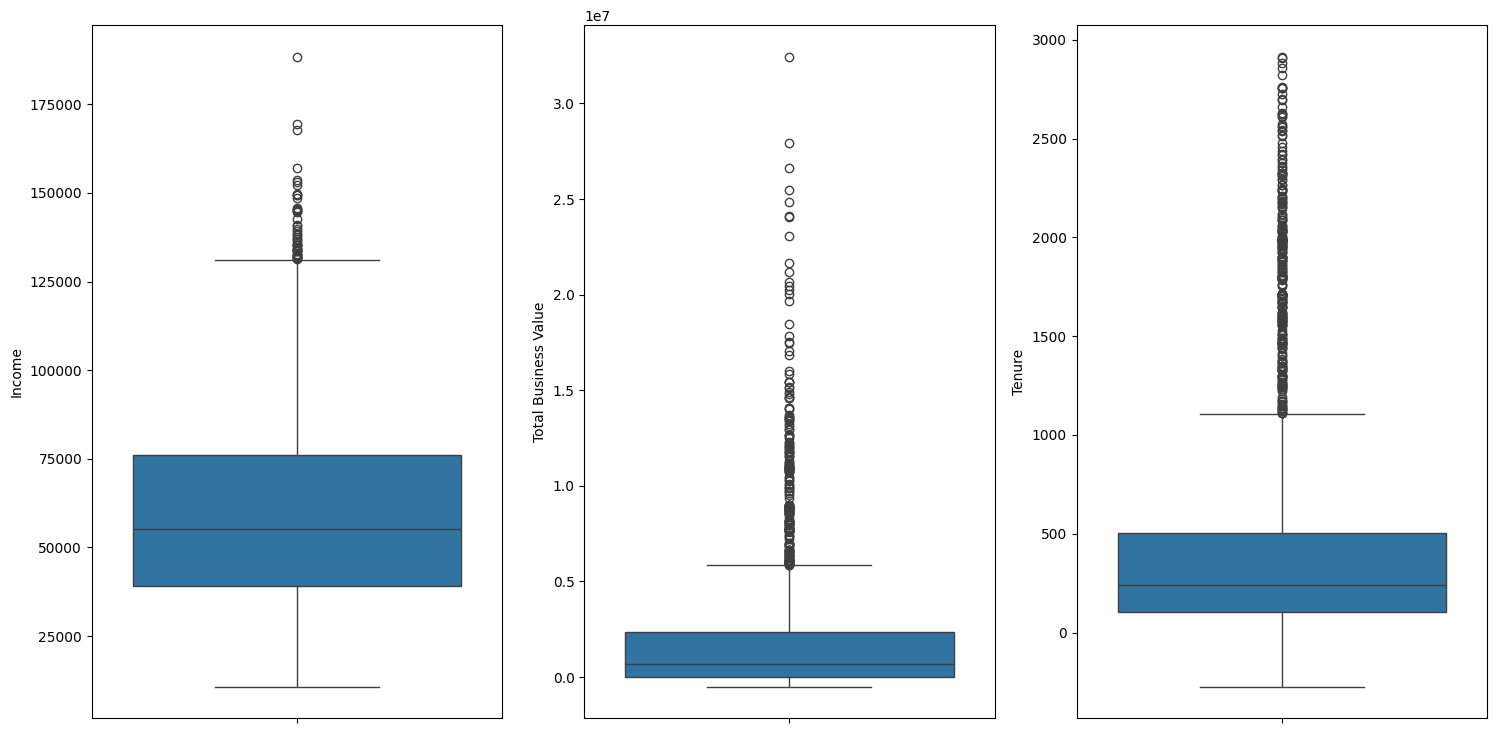

In [ ]:
cont_cols = ['Income', 'Total Business Value', 'Tenure']

plt.figure(figsize = (18,9))
for i, col in enumerate(cont_cols):
  plt.subplot(1, 3, i+1)
  sns.boxplot(df[col])
plt.show()

In [ ]:
df['Income'].min(), df['Income'].mean(), df['Income'].max()

(10747.0, 59334.157076858464, 188418.0)

In [ ]:
df['Total Business Value'].min(), df['Total Business Value'].mean(), df['Total Business Value'].max()

(-500000, 1918217.0432591347, 32442880)

In [ ]:
df['Tenure'].min(), df['Tenure'].mean(), df['Tenure'].max()

(-274.0, 451.3561528769425, 2915.0)

In [ ]:
df[df['Tenure']<0]

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Churn,LastDate,Tenure,LastMonth,Average Rating,Last Rating,Rating_Trend,Year
3,5,29.0,0,C9,0.0,46368.0,2019-09-01,1.0,1.0,120360,1.0,2019-07-03,-60.0,7.0,1.0,1.0,Same,2019
12,18,27.0,1,C17,1.0,31631.0,2019-09-01,1.0,1.0,0,1.0,2019-04-30,-124.0,4.0,1.0,1.0,Same,2019
23,35,32.0,0,C5,1.0,68070.0,2020-07-03,3.0,3.0,300000,1.0,2020-05-05,-59.0,5.0,1.0,1.0,Same,2020
45,59,35.0,1,C18,1.0,31644.0,2019-06-01,1.0,1.0,134660,1.0,2019-03-28,-65.0,3.0,1.0,1.0,Same,2019
66,82,37.0,1,C24,1.0,89013.0,2020-11-04,3.0,3.0,0,1.0,2020-07-29,-98.0,7.0,1.0,1.0,Same,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,2698,26.0,0,C21,1.0,58892.0,2020-03-17,2.0,2.0,0,1.0,2020-01-05,-72.0,1.0,1.0,1.0,Same,2020
2304,2701,25.0,0,C14,1.0,64281.0,2019-07-18,1.0,1.0,0,1.0,2019-05-10,-69.0,5.0,1.0,1.0,Same,2019
2316,2713,32.0,1,C9,2.0,23582.0,2019-06-30,2.0,2.0,300000,1.0,2019-04-10,-81.0,4.0,1.0,1.0,Same,2019
2335,2733,29.0,0,C10,2.0,56659.0,2020-12-09,2.0,2.0,0,1.0,2020-11-28,-11.0,11.0,1.0,1.0,Same,2020


### **Observation**:

* The columns 'Income', 'Tenure' and 'Total Business Value' show presence of outlier on the higher side. We will clip the data that is 3 Standard deviations above mean to get rid of extreme outliers.

* There are 135 records of Driver's with tenure less than 0. This indicates an error in recording the Date of Joining or Last Working Date. We will set the Tenure for such entries to 0.




In [ ]:
#Clipping Outliers in Income

mean_inc = df['Income'].mean()
std_inc = df['Income'].std()

upper_inc = round(mean_inc + 3 * std_inc)

df['Income'] = df['Income'].clip(upper=upper_inc)

upper_inc

144485

In [ ]:
#Clipping Outliers in Total Business Value

mean_bv = df['Total Business Value'].mean()
std_bv = df['Total Business Value'].std()

upper_bv = round(mean_bv + 3 * std_bv)

df['Total Business Value'] = df['Total Business Value'].clip(upper=upper_bv)

upper_bv

11778932

In [ ]:
df['Tenure'].isna().sum()

0

In [ ]:
# Replacing Tenure < 0 with 0

df['Tenure'] = df['Tenure'].clip(lower=0)

In [ ]:
#Clipping Outliers in Tenure

mean_tenure = df['Tenure'].mean()
std_tenure = df['Tenure'].std()

upper_tenure = round(mean_tenure + 3 * std_tenure)

df['Tenure'] = df['Tenure'].clip(upper=upper_tenure)

upper_tenure



2166

## **Binning Data**

In [ ]:
df_unbinned = df.copy()

In [ ]:
df.describe()

,Age,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Churn,LastDate,Tenure,LastMonth,Average Rating,Last Rating
count,2381.000000,2381.00000,2381.000000,2381,2381.000000,2381.000000,2.381000e+03,2381.000000,2381,2381.000000,2381.000000,2381.000000,2381.000000
mean,33.663167,1.00756,59269.753885,2019-01-27 12:58:58.009239808,1.820244,2.096598,1.800344e+06,0.678706,2020-04-22 21:31:49.617807872,449.195296,8.288954,1.532495,1.427971
min,21.000000,0.00000,10747.000000,2013-01-04 00:00:00,1.000000,1.000000,-5.000000e+05,0.000000,2018-12-31 00:00:00,0.000000,1.000000,1.000000,1.000000
25%,29.000000,0.00000,39104.000000,2018-06-26 00:00:00,1.000000,1.000000,0.000000e+00,0.000000,2019-09-14 00:00:00,105.000000,5.000000,1.000000,1.000000
50%,33.000000,1.00000,55315.000000,2019-06-23 00:00:00,2.000000,2.000000,6.790200e+05,1.000000,2020-07-04 00:00:00,239.000000,9.000000,1.000000,1.000000
75%,37.000000,2.00000,75986.000000,2020-04-14 00:00:00,2.000000,3.000000,2.344440e+06,1.000000,2020-12-28 00:00:00,506.000000,12.000000,2.000000,2.000000
max,58.000000,2.00000,144485.000000,2020-12-28 00:00:00,5.000000,5.000000,1.177893e+07,1.000000,2020-12-28 00:00:00,2166.000000,12.000000,4.000000,4.000000
std,5.983375,0.81629,28162.983534,NaN,0.841433,0.941522,2.713091e+06,0.467071,NaN,544.174253,3.817980,0.693180,0.809839


### **Binning By Age:**

In [ ]:
df['Age'].min(), df['Age'].max()

(21.0, 58.0)

In [ ]:
ages = [0,35,50,60]
groups = [ 'Young', 'Middle-Aged', 'Senior']

df['Age Groups'] = pd.cut(df['Age'], bins = ages, labels = groups)


### **Binning By Income**

In [ ]:
df['Income'].min(), df['Income'].max()

(10747.0, 144485.0)

In [ ]:
inc_range = [0,50000,100000,150000]
inc_groups = [ 'Low', 'Middle', 'High']

df['Income Groups'] = pd.cut(df['Income'], bins = inc_range, labels = inc_groups)


### **Binning By Total Business Value**

In [ ]:
print("Min:", df['Total Business Value'].min())
print("Mean:", df['Total Business Value'].mean())
print("Median:", df['Total Business Value'].median())
print("90th Percentile", df['Total Business Value'].quantile(0.90))
print("Max:", df['Total Business Value'].max())

Min: -500000
Mean: 1800344.314153717
Median: 679020.0
90th Percentile 5065450.0
Max: 11778932


In [ ]:
bv_range = [-500001,0,1800000,5000000,12000000]
bv_groups = [ 'Negative','Low', 'Middle', 'High']

df['Business Groups'] = pd.cut(df['Total Business Value'], bins = bv_range, labels = bv_groups)


### **Binning By Tenure**

In [ ]:
print("Min:", df['Tenure'].min())
print("Mean:", df['Tenure'].mean())
print("Median:", df['Tenure'].median())
print("25th Percentile", df['Tenure'].quantile(0.25))
print("75th Percentile", df['Tenure'].quantile(0.75))
print("90th Percentile", df['Tenure'].quantile(0.90))
print("Max:", df['Tenure'].max())

Min: 0.0
Mean: 449.1952960940781
Median: 239.0
25th Percentile 105.0
75th Percentile 506.0
90th Percentile 1338.0
Max: 2166.0


In [ ]:
tenure_range = [-1,105,450,1400,2200]
tenure_groups = [ 'Short','Mid', 'Long', 'Very Long']

df['Tenure Groups'] = pd.cut(df['Tenure'], bins = tenure_range, labels = tenure_groups)

# **Handling Null & Duplicate Records:**


In [ ]:
df.isna().sum(axis = 0)

,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
Joining Designation,0
Grade,0
Total Business Value,0


In [ ]:
df.duplicated().sum()

0

### **Comments:**

* The dataset does not contain and null or duplicate records.
* The null values earlier observed in 'Age', 'Gender', 'LastWorkingDate' have been removed by aggregation.



# **Summary of Data After Cleaning & Feature Engineering**

In [ ]:
df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Churn,LastDate,Tenure,LastMonth,Average Rating,Last Rating,Rating_Trend,Year,Age Groups,Income Groups,Business Groups,Tenure Groups
0,1,28.0,0,C23,2.0,57387.0,2018-12-24,1.0,1.0,1715580,1.0,2019-11-03,314.0,11.0,2.0,2.0,Same,2019,Young,Middle,Low,Mid
1,2,31.0,0,C7,2.0,67016.0,2020-06-11,2.0,2.0,0,0.0,2020-12-28,200.0,12.0,1.0,1.0,Same,2020,Young,Middle,Negative,Mid
2,4,43.0,0,C13,2.0,65603.0,2019-07-12,2.0,2.0,350000,1.0,2020-04-27,290.0,4.0,1.0,1.0,Same,2020,Middle-Aged,Middle,Low,Mid
3,5,29.0,0,C9,0.0,46368.0,2019-09-01,1.0,1.0,120360,1.0,2019-07-03,0.0,7.0,1.0,1.0,Same,2019,Young,Low,Low,Short
4,6,31.0,1,C11,1.0,78728.0,2020-07-31,3.0,3.0,1265000,0.0,2020-12-28,150.0,12.0,1.5,2.0,Improved,2020,Young,Middle,Low,Mid


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   category      
 1   Age                   2381 non-null   float64       
 2   Gender                2381 non-null   category      
 3   City                  2381 non-null   category      
 4   Education_Level       2381 non-null   float64       
 5   Income                2381 non-null   float64       
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   Joining Designation   2381 non-null   float64       
 8   Grade                 2381 non-null   float64       
 9   Total Business Value  2381 non-null   int64         
 10  Churn                 2381 non-null   float64       
 11  LastDate              2381 non-null   datetime64[ns]
 12  Tenure                2381 non-null   float64       
 13  LastMonth         

In [ ]:
df.describe()

,Age,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Churn,LastDate,Tenure,LastMonth,Average Rating,Last Rating
count,2381.000000,2381.00000,2381.000000,2381,2381.000000,2381.000000,2.381000e+03,2381.000000,2381,2381.000000,2381.000000,2381.000000,2381.000000
mean,33.663167,1.00756,59269.753885,2019-01-27 12:58:58.009239808,1.820244,2.096598,1.800344e+06,0.678706,2020-04-22 21:31:49.617807872,449.195296,8.288954,1.532495,1.427971
min,21.000000,0.00000,10747.000000,2013-01-04 00:00:00,1.000000,1.000000,-5.000000e+05,0.000000,2018-12-31 00:00:00,0.000000,1.000000,1.000000,1.000000
25%,29.000000,0.00000,39104.000000,2018-06-26 00:00:00,1.000000,1.000000,0.000000e+00,0.000000,2019-09-14 00:00:00,105.000000,5.000000,1.000000,1.000000
50%,33.000000,1.00000,55315.000000,2019-06-23 00:00:00,2.000000,2.000000,6.790200e+05,1.000000,2020-07-04 00:00:00,239.000000,9.000000,1.000000,1.000000
75%,37.000000,2.00000,75986.000000,2020-04-14 00:00:00,2.000000,3.000000,2.344440e+06,1.000000,2020-12-28 00:00:00,506.000000,12.000000,2.000000,2.000000
max,58.000000,2.00000,144485.000000,2020-12-28 00:00:00,5.000000,5.000000,1.177893e+07,1.000000,2020-12-28 00:00:00,2166.000000,12.000000,4.000000,4.000000
std,5.983375,0.81629,28162.983534,NaN,0.841433,0.941522,2.713091e+06,0.467071,NaN,544.174253,3.817980,0.693180,0.809839


In [ ]:
df['City'].nunique()

29

In [ ]:
df['Gender'].value_counts()

,count
Gender,
0,1404
1,977


In [ ]:
print("Youngest :", df['Age'].min())
print("Oldest :", df['Age'].max())

Youngest : 21.0
Oldest : 58.0


In [ ]:
df['Business Groups'].value_counts()

,count
Business Groups,
Low,924
Negative,725
Middle,487
High,245


##**Summary**

* The dataset contains 22 columns/attributes and 2381 unique records
* The dataset does not contain any null or duplicate records
* 'Churn' is the target variable.

* Categorical Columns in the dataset
  * Driver_ID : The dataset contains records of 2381 drivers identified by ID.
  * Gender : Of the 2381 driver, 1404 are male and 977 are female.
  * City : The dataset contains records of drivers from 29 cities.
  * Rating_Trend
  * Age Groups
  * Income Groups
  * Business Groups
  * Tenure Groups
  * Year

* Discreet Numerical Columns
  * Age: The age of drivers ranges from 21 to 58.
  * Education_Level
  * Joining Designation
  * Grade
  * Churn : Target Variable with 1 indicating Churn (Class 1) and 0 indicating Not (Class 0).
  * LastMonth : Last working date of drivers who have quit OR last date as 2020-12-28 for drivers who have not quit.
  * Last Rating :
* Continuous Numerical Columns
  * Income : Ranges from 10747 to 144485 (capped due tio clipping) with a average of 59270
  * Total Business Value : Ranges from -500000 to 11778932 with a mean of 1800344.
  * Tenure : Ranging from 0 to 2166 days
  * Average Rating
* Date Time Columns
  * DateofJoining
  * LastDate



# **Exploratory Data Analysis**

## **Questionnaire:**


1. What percentage of drivers have received a quarterly rating of 5?
2. Comment on the correlation between Age and Quarterly Rating.
3. Name the city which showed the most improvement in Quarterly Rating over
the past year
4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.
(T/F)
5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?
6. Besides the obvious features like "Number of Rides", which lesser-discussed
features might have a strong impact on a driver's Quarterly Rating?
7. Will the driver's performance be affected by the City they operate in? (Yes/No)
8. Analyze any seasonality in the driver's ratings. Do certain times of the year
correspond to higher or lower ratings, and why might that be?


In [ ]:
#Quarterly Data

df_quarterly.head()

,Driver_ID,Quarter,Quarterly Rating,Rating_Change,Rating_Trend,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Churn,LastDate,Tenure,LastMonth,Average Rating,Last Rating,Year
0,1,2019-Q1,2.0,NaN,Same,28.0,0,C23,2.0,57387.0,2018-12-24,1.0,1.0,1715580,1.0,2019-11-03,314.0,11.0,2.0,2.0,2019
1,2,2020-Q4,1.0,NaN,Same,31.0,0,C7,2.0,67016.0,2020-06-11,2.0,2.0,0,0.0,2020-12-28,200.0,12.0,1.0,1.0,2020
2,4,2019-Q4,1.0,NaN,Same,43.0,0,C13,2.0,65603.0,2019-07-12,2.0,2.0,0,0.0,2020-12-28,535.0,12.0,1.0,1.0,2019
3,4,2020-Q1,1.0,0.0,Same,43.0,0,C13,2.0,65603.0,2019-07-12,2.0,2.0,350000,0.0,2020-12-28,535.0,12.0,1.0,1.0,2020
4,4,2020-Q2,1.0,0.0,Same,43.0,0,C13,2.0,65603.0,2019-07-12,2.0,2.0,0,1.0,2020-04-27,290.0,4.0,1.0,1.0,2020


####**What percentage of drivers have received a quarterly rating of 5?***

In [ ]:
max_rating = df_quarterly.groupby('Driver_ID')['Quarterly Rating'].max().reset_index()
max_rating['Quarterly Rating'].value_counts()

,count
Quarterly Rating,
1.0,1202
2.0,484
3.0,355
4.0,340


In [ ]:
df_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             7357 non-null   category      
 1   Quarter               7357 non-null   object        
 2   Quarterly Rating      7357 non-null   float64       
 3   Rating_Change         4976 non-null   float64       
 4   Rating_Trend          7357 non-null   category      
 5   Age                   7355 non-null   float64       
 6   Gender                7355 non-null   category      
 7   City                  7357 non-null   category      
 8   Education_Level       7357 non-null   float64       
 9   Income                7357 non-null   float64       
 10  Dateofjoining         7357 non-null   datetime64[ns]
 11  Joining Designation   7357 non-null   float64       
 12  Grade                 7357 non-null   float64       
 13  Total Business Val

####**What's the correlation between Age and Quarterly Rating?***

<Axes: >

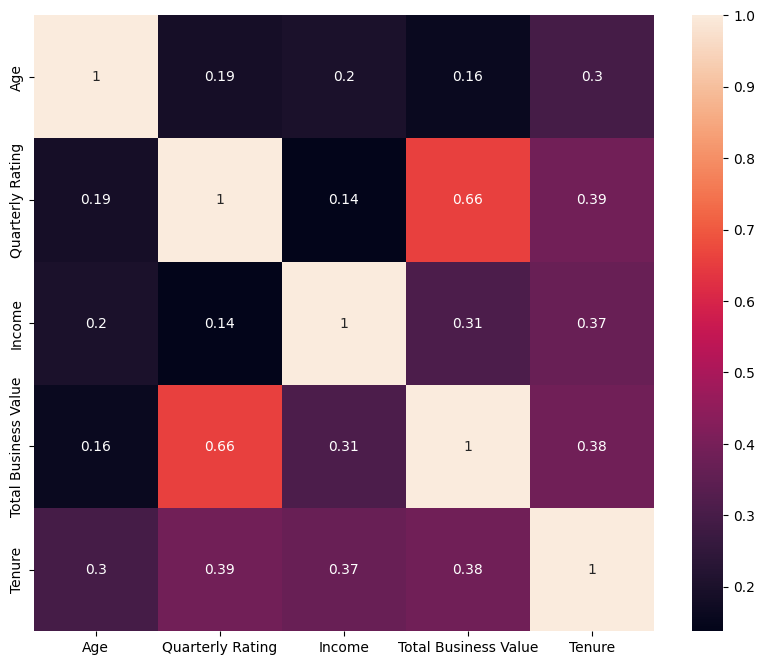

In [ ]:
numeric_cols = df_quarterly[['Age','Quarterly Rating', 'Income','Total Business Value', 'Tenure']]

plt.figure(figsize = (10,8))
sns.heatmap(numeric_cols.corr(), annot=True)

<Axes: >

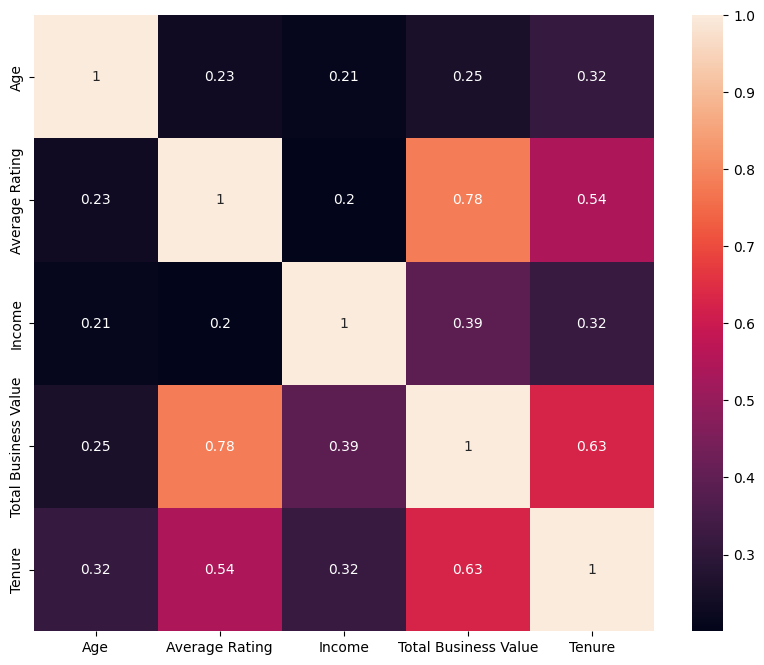

In [ ]:
numeric_cols = df[['Age','Average Rating', 'Income','Total Business Value', 'Tenure']]

plt.figure(figsize = (10,8))
sns.heatmap(numeric_cols.corr(), annot=True)

####**Which City showed the most improvement in Quarterly Rating over the past year?**


In [ ]:
df_quarterly['Year'] = df_quarterly['Quarter'].str[:4]
df_quarterly['Rating_Change'] = df_quarterly.groupby('Driver_ID')['Quarterly Rating'].diff()
df_quarterly[(df_quarterly['Rating_Change'] > 0) & (df_quarterly['Year'] == "2020")].groupby('City')['Driver_ID'].nunique().sort_values(ascending=False).head()

,Driver_ID
City,
C29,33
C20,29
C26,27
C8,27
C15,26


####**Are drivers with a Grade of ‘A’  more likely to have a higher Total Business Value?**


<Axes: xlabel='Grade', ylabel='Total Business Value'>

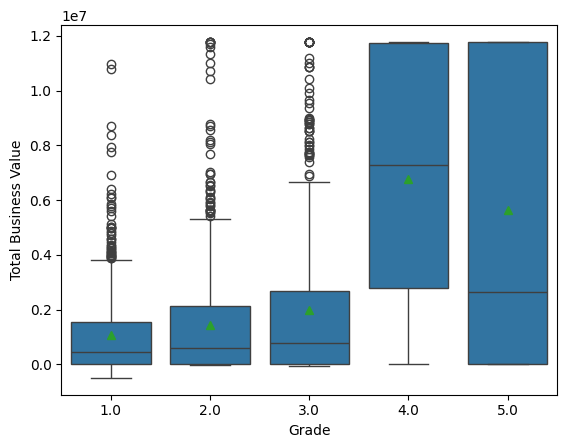

In [ ]:
sns.boxplot(data = df, x ="Grade", y = 'Total Business Value', showmeans=True)

In [ ]:
pd.crosstab(df['Grade'], df['Business Groups'], margins = True, normalize = 'index')

Business Groups,Negative,Low,Middle,High
Grade,,,,
1.0,0.321188,0.464238,0.188934,0.025641
2.0,0.330994,0.390643,0.219883,0.058480
3.0,0.298555,0.364366,0.207063,0.130016
4.0,0.072464,0.108696,0.210145,0.608696
5.0,0.333333,0.166667,0.041667,0.458333
All,0.304494,0.388072,0.204536,0.102898


####**If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?**

Interpretation: Significant drop in rating is if rating change is more than -1 (i.e. -2 onwards) , Subsequent Period = Next Quarter


In [ ]:

#Table for Ratings and Total Business Value Analysis
df_ratings_TBV = df_quarterly[['Driver_ID','Quarter','Quarterly Rating','Rating_Change','Rating_Trend','Total Business Value','Churn']].reset_index(drop = True)

# Shifting values from previous and next quarter
df_ratings_TBV['Previous_Quarter_TBV'] = df_ratings_TBV.groupby('Driver_ID')['Total Business Value'].shift(+1)
df_ratings_TBV['Next_Quarter_TBV'] = df_ratings_TBV.groupby('Driver_ID')['Total Business Value'].shift(-1)

# Difference in TBV from Previous Quarter
df_ratings_TBV['TBV_Diff_Previous_Quarter'] = df_ratings_TBV['Total Business Value'] - df_ratings_TBV['Previous_Quarter_TBV']
df_ratings_TBV['TBV_Percent_Change_Previous_Quarter'] = (df_ratings_TBV['TBV_Diff_Previous_Quarter'] / df_ratings_TBV['Previous_Quarter_TBV']) * 100
df_ratings_TBV['TBV_Change_Previous_Quarter'] = df_ratings_TBV['TBV_Diff_Previous_Quarter'].apply(lambda x: "Increased" if x > 0 else ("Same" if x == 0 else "Dropped"))



# Difference in TBV from Previous Quarter
df_ratings_TBV['TBV_Diff_Next_Quarter'] = df_ratings_TBV['Next_Quarter_TBV'] - df_ratings_TBV['Total Business Value']
df_ratings_TBV['TBV_Percent_Change_Next_Quarter'] = (df_ratings_TBV['TBV_Diff_Next_Quarter'] / df_ratings_TBV['Total Business Value']) * 100
df_ratings_TBV['TBV_Change_Next_Quarter'] = df_ratings_TBV['TBV_Diff_Next_Quarter'].apply(lambda x: "Increased" if x > 0 else ("Same" if x == 0 else "Dropped"))


# Filtering rows with significant drop in rating (<-1)

df_ratings_TBV = df_ratings_TBV[df_ratings_TBV['Rating_Change']<-1].reset_index(drop = True)

In [ ]:
df_ratings_TBV[(df_ratings_TBV['Total Business Value'] == 0) & (df_ratings_TBV['Next_Quarter_TBV'] > 0)]

,Driver_ID,Quarter,Quarterly Rating,Rating_Change,Rating_Trend,Total Business Value,Churn,Previous_Quarter_TBV,Next_Quarter_TBV,TBV_Diff_Previous_Quarter,TBV_Percent_Change_Previous_Quarter,TBV_Change_Previous_Quarter,TBV_Diff_Next_Quarter,TBV_Percent_Change_Next_Quarter,TBV_Change_Next_Quarter
84,835,2020-Q3,1.0,-3.0,Dropped,0,0.0,3485500.0,441560.0,-3485500.0,-100.0,Dropped,441560.0,inf,Increased
90,904,2020-Q2,1.0,-2.0,Dropped,0,0.0,5870040.0,1177540.0,-5870040.0,-100.0,Dropped,1177540.0,inf,Increased
123,1173,2020-Q1,1.0,-2.0,Dropped,0,0.0,1765140.0,400000.0,-1765140.0,-100.0,Dropped,400000.0,inf,Increased
164,1560,2019-Q4,1.0,-2.0,Dropped,0,0.0,1717140.0,2067730.0,-1717140.0,-100.0,Dropped,2067730.0,inf,Increased
175,1621,2019-Q2,1.0,-3.0,Dropped,0,0.0,5585990.0,1933650.0,-5585990.0,-100.0,Dropped,1933650.0,inf,Increased
217,2002,2019-Q2,1.0,-2.0,Dropped,0,0.0,11590020.0,565880.0,-11590020.0,-100.0,Dropped,565880.0,inf,Increased
226,2049,2019-Q2,1.0,-2.0,Dropped,0,0.0,8138260.0,3439400.0,-8138260.0,-100.0,Dropped,3439400.0,inf,Increased
230,2070,2020-Q2,1.0,-3.0,Dropped,0,0.0,11081000.0,2337480.0,-11081000.0,-100.0,Dropped,2337480.0,inf,Increased


In [ ]:
df_ratings_TBV.shape

(323, 15)

In [ ]:
df_ratings_TBV['TBV_Change_Previous_Quarter'].value_counts()

,count
TBV_Change_Previous_Quarter,
Dropped,317
Increased,6


In [ ]:
df_ratings_TBV['TBV_Change_Previous_Quarter'].value_counts(normalize = True)

,proportion
TBV_Change_Previous_Quarter,
Dropped,0.981424
Increased,0.018576


In [ ]:
df_ratings_TBV['TBV_Change_Next_Quarter'].value_counts()

,count
TBV_Change_Next_Quarter,
Dropped,193
Increased,126
Same,4


In [ ]:
df_ratings_TBV['TBV_Change_Next_Quarter'].value_counts(normalize = True)

,proportion
TBV_Change_Next_Quarter,
Dropped,0.597523
Increased,0.390093
Same,0.012384


In [ ]:
df_ratings_TBV['TBV_Percent_Change_Previous_Quarter'].mean()

-79.8770760712637

In [ ]:
mean_NextQ_Percent = df_ratings_TBV[df_ratings_TBV['TBV_Percent_Change_Next_Quarter'] != np.inf]

mean_NextQ_Percent[mean_NextQ_Percent['TBV_Change_Next_Quarter']== "Dropped"]['TBV_Percent_Change_Next_Quarter'].mean()

-72.93424972558793

In [ ]:
mean_NextQ_Percent = df_ratings_TBV[df_ratings_TBV['TBV_Percent_Change_Next_Quarter'] != np.inf]

mean_NextQ_Percent[mean_NextQ_Percent['TBV_Change_Next_Quarter']== "Increased"]['TBV_Percent_Change_Next_Quarter'].mean()

380.5591936400655

####**Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?**



In [ ]:
df_quarterly.columns

Index(['Driver_ID', 'Quarter', 'Quarterly Rating', 'Rating_Change',
       'Rating_Trend', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'Joining Designation', 'Grade', 'Total Business Value',
       'Churn', 'LastDate', 'Tenure', 'LastMonth', 'Average Rating',
       'Last Rating', 'Year'],
      dtype='object')

In [ ]:
from scipy import stats

cols = ['Gender', 'City', 'Education_Level','Joining Designation', 'Grade', 'Quarter']

for var in cols:
    print(f"Performing ANOVA for {var}:")

    categories = df_quarterly[var].unique()

    groups = []

    for category in categories:
        groups.append(df_quarterly[df_quarterly[var] == category]['Quarterly Rating'])

    f_stat, p_value = stats.f_oneway(*groups)

    print(f"F-statistic: {f_stat}, P-value: {p_value}\n")


    if p_value < 0.05:
        print(f"Significant difference found for {var} with p-value: {p_value}\n")
    else:
        print(f"No significant difference found for {var} with p-value: {p_value}\n")

Performing ANOVA for Gender:
F-statistic: nan, P-value: nan

No significant difference found for Gender with p-value: nan

Performing ANOVA for City:
F-statistic: 2.9665586872231673, P-value: 2.587773565773544e-07

Significant difference found for City with p-value: 2.587773565773544e-07

Performing ANOVA for Education_Level:
F-statistic: 6.613467713225343, P-value: 0.001350166542094329

Significant difference found for Education_Level with p-value: 0.001350166542094329

Performing ANOVA for Joining Designation:
F-statistic: 118.55105596528092, P-value: 3.649405721298043e-98

Significant difference found for Joining Designation with p-value: 3.649405721298043e-98

Performing ANOVA for Grade:
F-statistic: 4.967269642022455, P-value: 0.0005358456407280528

Significant difference found for Grade with p-value: 0.0005358456407280528

Performing ANOVA for Quarter:
F-statistic: 1.3767706065941288, P-value: 0.21025816468013178

No significant difference found for Quarter with p-value: 0.210258

####**Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?**

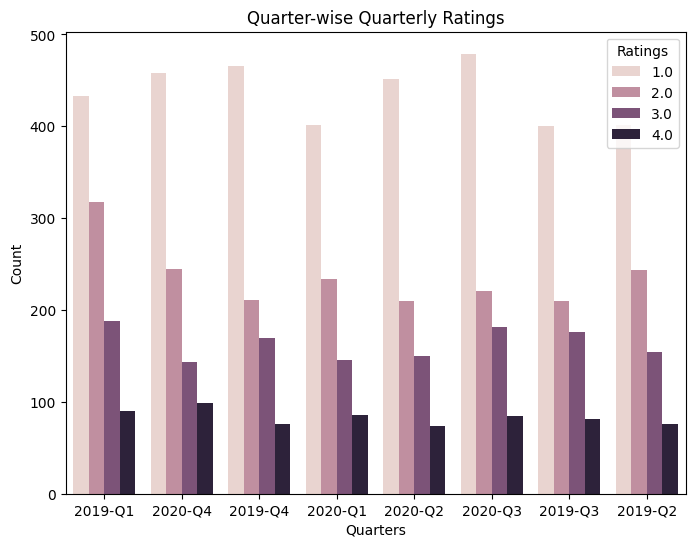

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Quarter', hue='Quarterly Rating', data = df_quarterly)
plt.title('Quarter-wise Quarterly Ratings')
plt.xlabel('Quarters')
plt.ylabel('Count')
plt.legend(title='Ratings', loc='upper right')
plt.show()

### **Answers:**

* **Q1: What percentage of drivers have received a quarterly rating of 5?**
  * None of the drivers have received a quarterly rating of 5

....

* **Q2. Comment on the correlation between Age and Quarterly Rating.**
  * There's a weak positive correlation between Age and Quarterly Rating (or even Average Quaterly Rating) which means and increase in either variable will result a minute (insignificant) increase in the other.

......

* **Q3. Name the city which showed the most improvement in Quarterly Rating over the past year**
  * City C29 saw the most number of improvements in driver Quarterly Ratings in 2020.

........

* **4. Drivers with a Grade of 'A' are more likely to have a higher Total Business Value. (T/F)**
  * Considering Grade 5 as 'A', Grade 4 as'B' and Grade 1, 2, 3 as E, D, C respectively, the statement is not entirely true.
    * Drivers with Grade 'A' have a higher average Total Business Value as compared to Grades E, D, C ; however, their average Total Business Value is less than Grade B.
    * Grade A drivers are more likely to have a higher Total Business Value than Grades E, D, C but that's not true for Group B and higher 25th Quartile. Grade B drivers also have a higher median.
    * The probability of a Grade A (5) driver having a high Total Business Value (above 5000000) is lesser than that of a Grade B (4) driver.
    * This indicates that Total Business Value is not the only criteria for  Grading

.......

5. **If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?**
  * Considering drop more than -1 as significant drop and subsequent period as the next quarter..
    * There are 323 drivers who saw a more than -1 decrease in their rating.
    * 317/323 (98%) drivers saw a drecrease in their Total Business Value **in the Quarter where their rating dropped.** On average their Total Business Value dropped by 79%
    * 193/323 (60%) drivers saw an average decrease of -73% in their Total Business Value **in the Subsequent Quarter after their rating dropped**. 126/323 (39%) saw an increase of 380% (after omitting inf increases). The % increase however might not be accurate required further check on values recorded in the 'Total Business Value' column where many records are 0.

....

6. **Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?**
 * Using a correlation heatmap we ascertained there is no strong correlation between Quarterly Ratings and Age, Income, and 'Tenure. . Quarterly Rating have a moderately strong correlation with 'Total Bussiness Value' however can be understood that 'Total Bussiness Value' might by influenced by higher Quarterly Ratings and not the other way round if rating are allocated by customers.
 * We performed an ANOVA One way test to check if there's a statistically signficant difference (which suggests impact) in Quarterly Ratings between the groups in variables such 'Gender', 'City', 'Education_Level','Joining Designation' and 'Grade' on Quaterly Ratings.
 * With the results of the ANOVA test we can say that the following features have an impact in driver's Quarterly Rating.
  * City
  * Education_Level
  * Joining Designation
  * Grade

....

7. **Will the driver's performance be affected by the City they operate in? (Yes/No)**
 * Yes. The results of the ANOVA test suggests than the driver's performance will be afftected by the City they operate in.


....

8. **Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?**
  * The Quarterly Ratings trend is fairly cosistent across all quarters we have data for. There is little variation in the different ratings across Q1 2019 to Q4 2020 suggesting that seasonality does not atrongly affect ratings.





## **Analysing Discreet Variables**

In [ ]:
df.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'Joining Designation', 'Grade', 'Total Business Value',
       'Churn', 'LastDate', 'Tenure', 'LastMonth', 'Average Rating',
       'Last Rating', 'Rating_Trend', 'Year', 'Age Groups', 'Income Groups',
       'Business Groups', 'Tenure Groups'],
      dtype='object')

In [ ]:
# Target Variable Split

df['Churn'].value_counts(normalize=True)


,proportion
Churn,
1.0,0.678706
0.0,0.321294


In [ ]:
ch = pd.DataFrame(df['Churn'].value_counts(normalize=True)).reset_index()

In [ ]:
ch

,Churn,proportion
0,1.0,0.678706
1,0.0,0.321294


<Axes: xlabel='Churn', ylabel='proportion'>

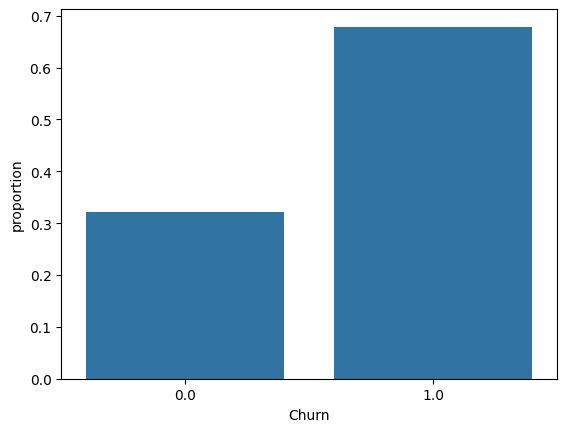

In [ ]:
sns.barplot(data = ch, x = 'Churn' , y = 'proportion')

###**Observation on Target Variable#:**

* 67.87% of the drivers in the dataset quit (class 1) , whereas 32.13% of the drivers are retained (class 0).

* The data is slightly imbalanced with class 1 having a higher proportion.

### **Univariate Analysis: Bar Plots**

In [ ]:
disc_cols = ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade', 'LastMonth', 'Last Rating', 'Rating_Trend', 'Age Groups', 'Income Groups',
       'Business Groups', 'Tenure Groups']

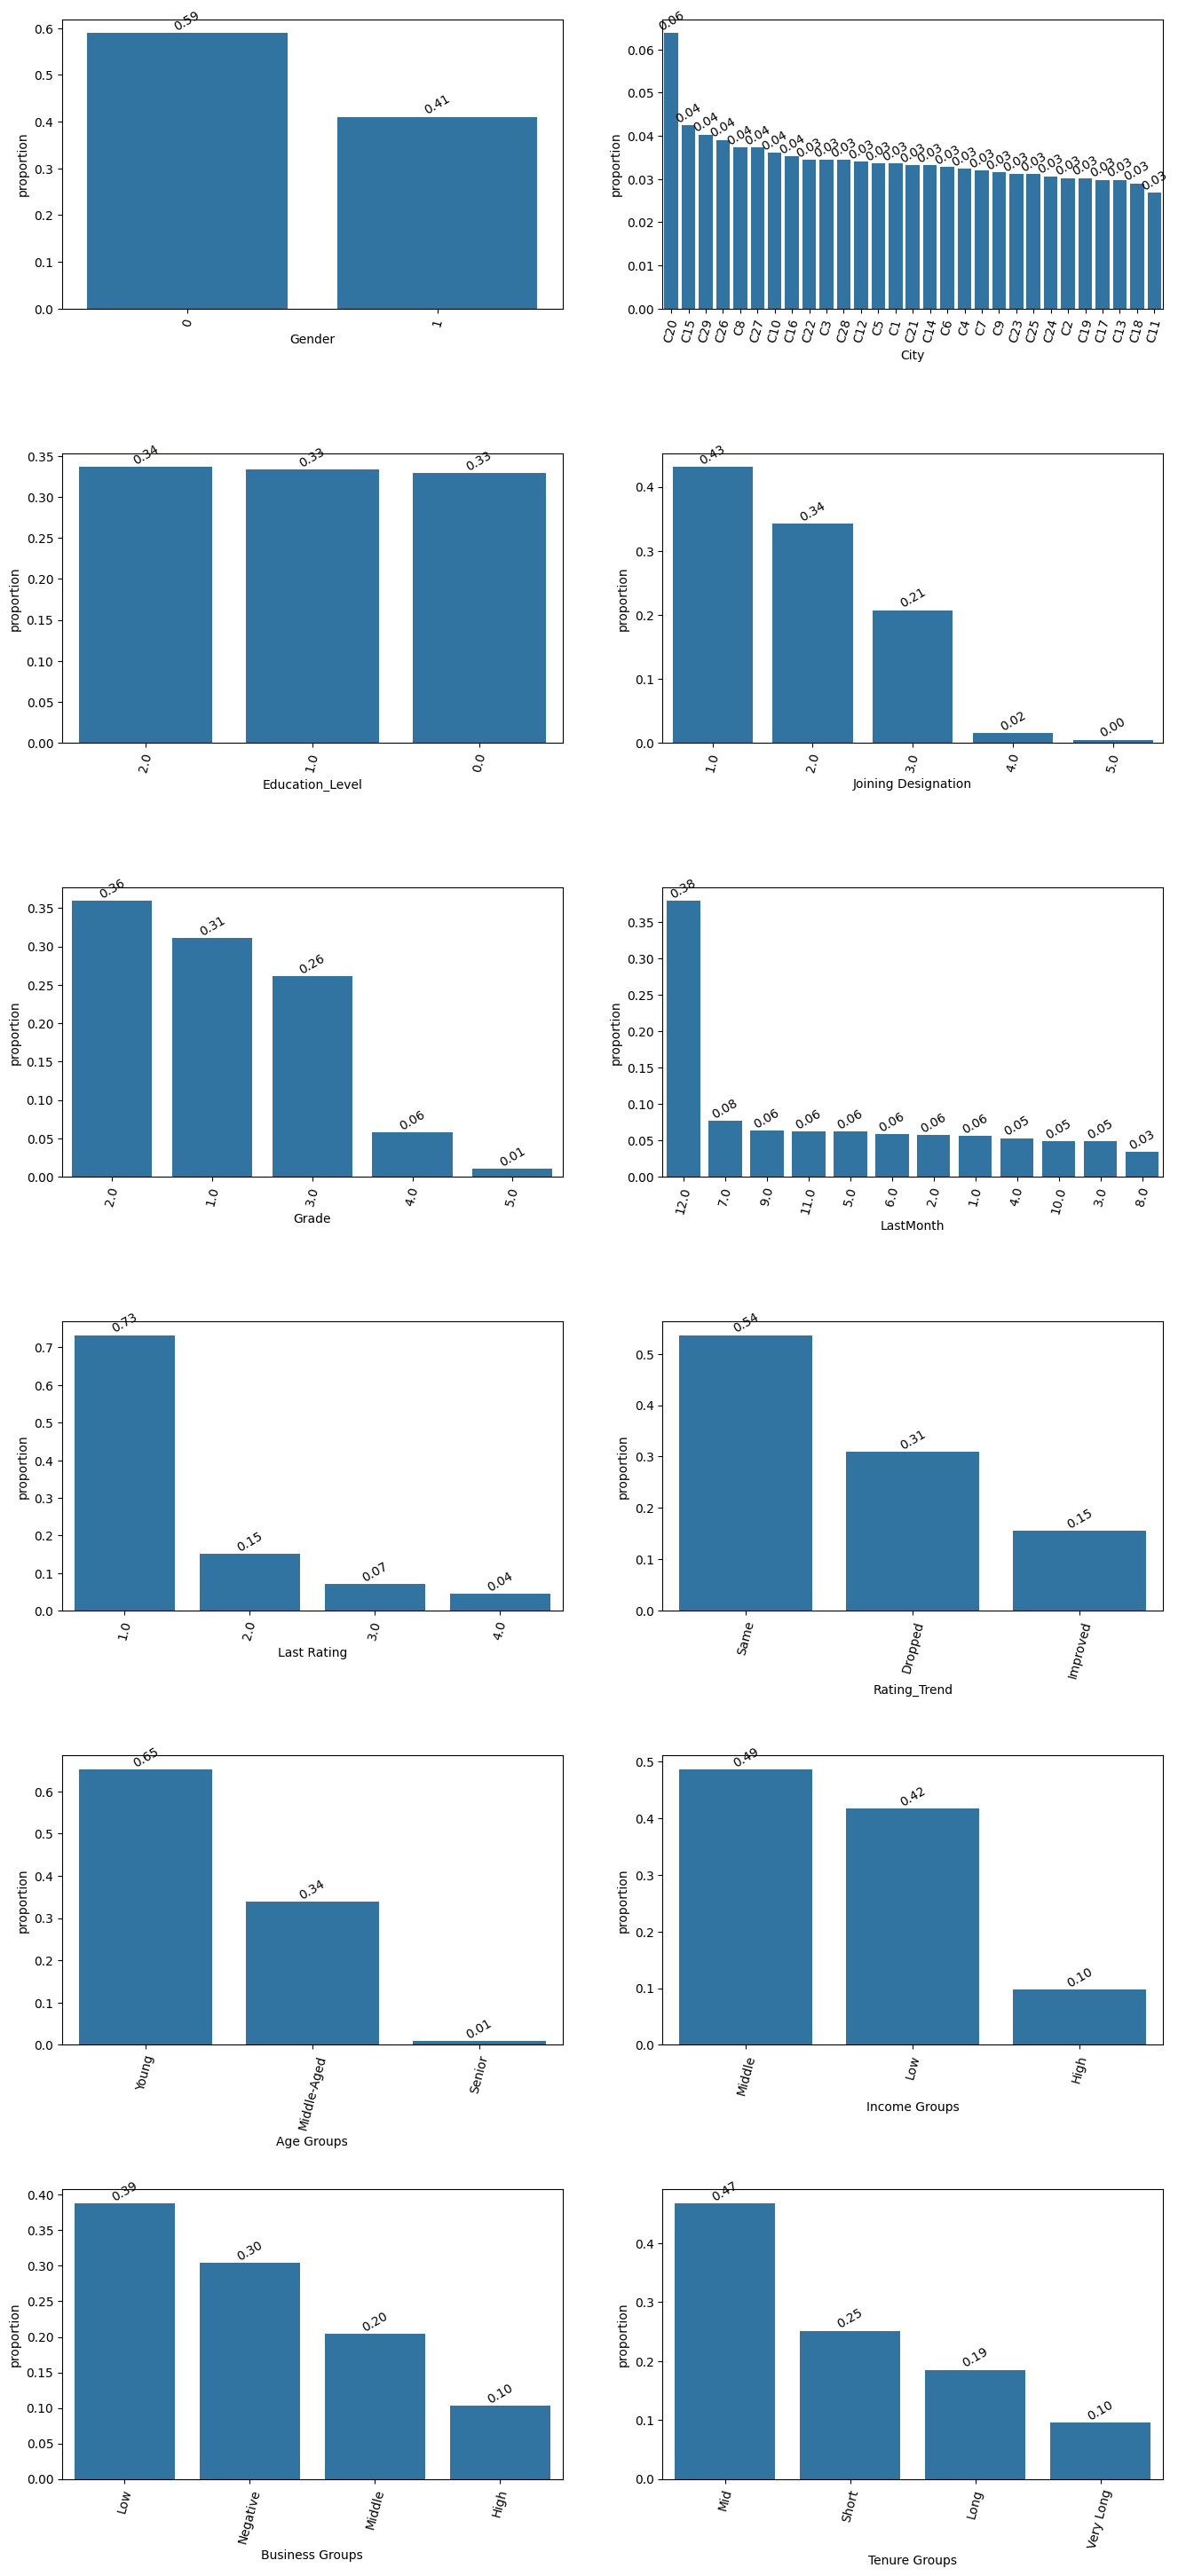

In [ ]:
plt.figure(figsize = (16,36))
for i, col in enumerate(disc_cols):
  table = pd.DataFrame(df[col].value_counts(normalize=True).reset_index())
  table.columns = [col, 'proportion']
  plt.subplot(6, 2, i+1)
  ax = sns.barplot(data = table, x = col, y = 'proportion', order=table[col])

  ax.bar_label(ax.containers[0], fmt='%.2f', rotation= 30)

  plt.xticks(rotation= 75)

plt.subplots_adjust(hspace=0.5)
plt.show()


[Text(0, 0, '0.11'),
 Text(0, 0, '0.09'),
 Text(0, 0, '0.09'),
 Text(0, 0, '0.09'),
 Text(0, 0, '0.09'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.07'),
 Text(0, 0, '0.07'),
 Text(0, 0, '0.05')]

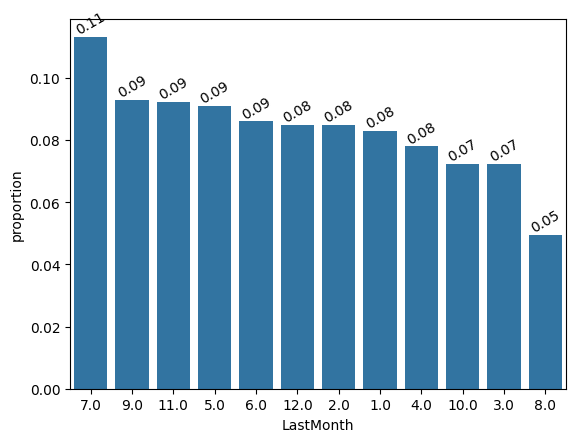

In [ ]:
lm_churned = df[df['Churn']==1]['LastMonth'].value_counts(normalize=True).reset_index()
ax = sns.barplot(data = lm_churned, x = 'LastMonth', y = 'proportion', order=lm_churned['LastMonth'])
ax.bar_label(ax.containers[0], fmt='%.2f', rotation= 30)

,Last Rating,proportion
0,1.0,0.886139
1,2.0,0.090347
2,3.0,0.017327
3,4.0,0.006188


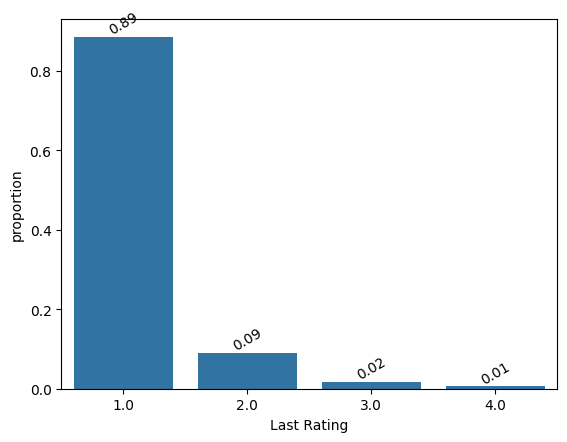

In [ ]:
lr_churned = df[df['Churn']==1]['Last Rating'].value_counts(normalize=True).reset_index()
ax = sns.barplot(data = lr_churned, x = 'Last Rating', y = 'proportion', order=lr_churned['Last Rating'])
ax.bar_label(ax.containers[0], fmt='%.2f', rotation= 30)
lr_churned

,Rating_Trend,proportion
0,Same,0.610149
1,Dropped,0.331064
2,Improved,0.058787


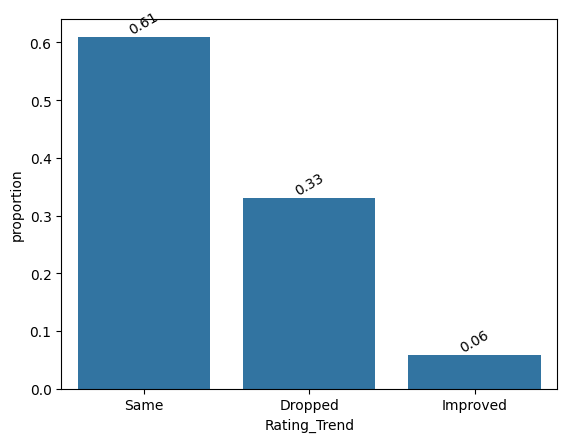

In [ ]:
rt_churned = df[df['Churn']==1]['Rating_Trend'].value_counts(normalize=True).reset_index()
ax = sns.barplot(data = rt_churned, x = 'Rating_Trend', y = 'proportion', order=rt_churned['Rating_Trend'])
ax.bar_label(ax.containers[0], fmt='%.2f', rotation= 30)
rt_churned

#### **Observations:**

1. 59% of the drivers are male, 41% of drivers are female.
2. Of the 2381 drivers, 6% are from City C20. The rest of the cities have a share of 3% or 4%.
3. There are nearly equal number of Drivers with eduation level 10+, 12+ and Graduation.
4. 43% of driver joined at designation 1, 34% joined at designation 2 and 21% joined at designation 3. It's rare for a drivers to join at designation 4 and almost no drivers join at designation 5.
5. 31% of the drivers have been given Grade 1, 36% given Grade 2 and 26% given Grade 3. 6% drivers have been given Grade 4 and 1% have been given Grade 5. The criteria for assigning grades is still not clear and has to be established by comparison with Income, Tenure, Business Value and other parameters.
6. Among drivers who have churned, the highest number of exits i.e. 11% happened in month of July and the lowest happened in the month of August. Between 7% to 9% quit in the other months. The count is fairly even with the minimum and maximum not deviating much which doesn't give us any certain insight.
7. 89% of the drivers who quit had a rating of 1 suggesting that poor rating could be a very strong indicator for driver churn.
8. 61% of the drivers who quit maintained the Same rating througout their tenure (which could likely be poor) whereas 33% quit after seeing a worse rating. Only 6 person of the drivers who quit had improved their ratings before leaving.
9. 65% of the drivers in the dataset are Young (21 to 35) , 35% are Middle Aged (35 to 50) and 1% of drivers are Senior (50+)
10. 42% of drivers had a low income, 49% were in the medium income range, whereas 10% had a high income.
11. 30% of Driver had negative Business Value, 39% had low business value and, 20% had a medium business value and 10% had high business value.
12. 47% of drivers served for a medium Tenure. 25% of drivers served for a short tenure (lasting less than 105 days), 19% served for a long tenure and 10% served for very long.


### **Bi-variate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   category      
 1   Age                   2381 non-null   float64       
 2   Gender                2381 non-null   category      
 3   City                  2381 non-null   category      
 4   Education_Level       2381 non-null   float64       
 5   Income                2381 non-null   float64       
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   Joining Designation   2381 non-null   float64       
 8   Grade                 2381 non-null   float64       
 9   Total Business Value  2381 non-null   int64         
 10  Churn                 2381 non-null   float64       
 11  LastDate              2381 non-null   datetime64[ns]
 12  Tenure                2381 non-null   float64       
 13  LastMonth         

###**Churn within Categorical Groups**

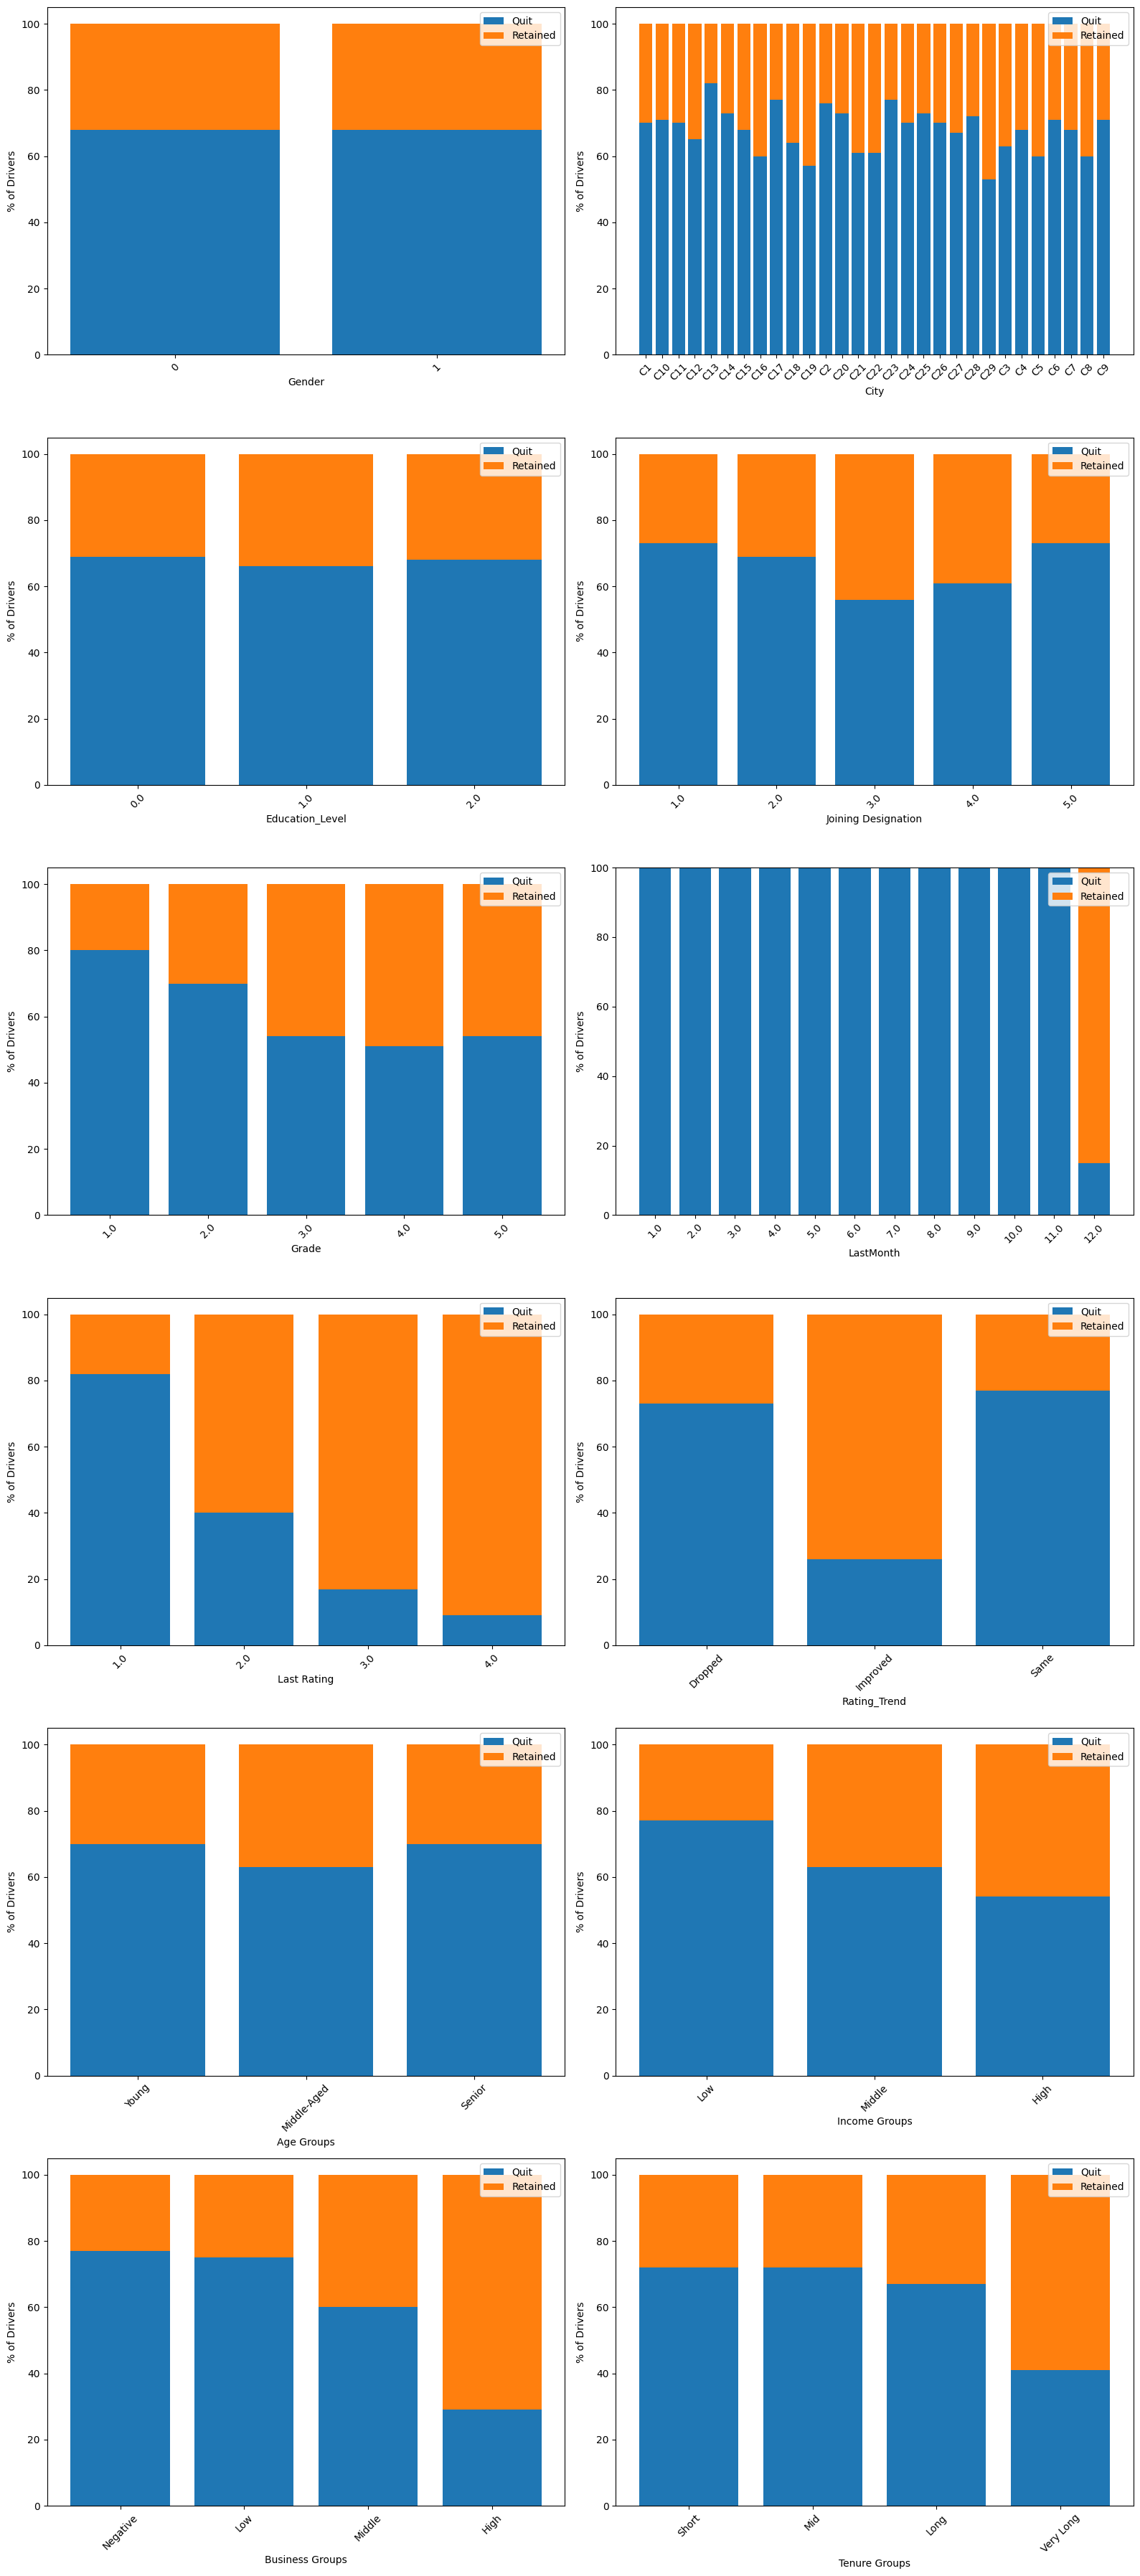

In [ ]:
plt.figure(figsize=(16,36))
for i, col in enumerate(disc_cols):
  ax=plt.subplot(6,2,i+1)

  data = df.pivot_table(index=col, columns='Churn', aggfunc='count', values='Driver_ID')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col].astype(str),data[1.0])
  plt.bar(data[col].astype(str),data[0.0], bottom = data[1.0])
  plt.xlabel(f'{col}')
  plt.xticks(rotation= 45)
  plt.ylabel('% of Drivers')
  plt.legend(['Quit','Retained'])

  ax.set_xticks(range(len(data[col])))
  ax.set_xticklabels(data[col].astype(str))


plt.tight_layout()
plt.show()

In [ ]:
df[df['Churn'] == 1]['Last Rating'].value_counts(normalize=True)

,proportion
Last Rating,
1.0,0.886139
2.0,0.090347
3.0,0.017327
4.0,0.006188


#### **Observations:**

The stacked bar plots compare proportions of Drivers who have Quit or been Retained for categorical variables.

* There is no difference in attrition rates between Drivers of different Genders, Education Level and Age Groups.
* Cities C13, C17, C23 had highest attrition while cities C29, C19 and C16 had the lowest attrition. Attrition across cities is between 60% to 80%.
* There is slightly lower attrition among Drivers who joined at designations 3 and 4 compared to drivers who joined at designation 1,2 or 5.
* There is slightly lower attrition among drivers with higher grades (3,4,5)
* Drivers with higher last recorded ratings show significantly less attrition compared to drivers with lower ratings. The lower the last rating, the higher the attrition. 88.5% of drivers who quit had a rating of 1. This suggests there is high risk of churn among drivers with low ratings and poor rating is a strong indicator of a driver quitting.
*  There is significantly less attrition among drivers whose ratings improved vs drivers whose rating remained the same or dropped during their tenure. This indicates that a drop in rating might result in a driver leaving.
* Attrition is higher among drivers with a lower income. Attrition increases as income decreases.  
* There is significantly lower attrition among drivers with higher Total Business Value.
* Attrition amongst drivers who served short, mid and long tenures is nearly same. However, there is significantly less attrition among drivers who served very long tenures suggesting the longer the driver stays, the lower the risk of churn.  


## **Analysing Numerical Variables**

In [ ]:
num_cols = ['Income', 'Age', 'Total Business Value', 'Tenure', 'Average Rating']

### **Correlation**

<Axes: >

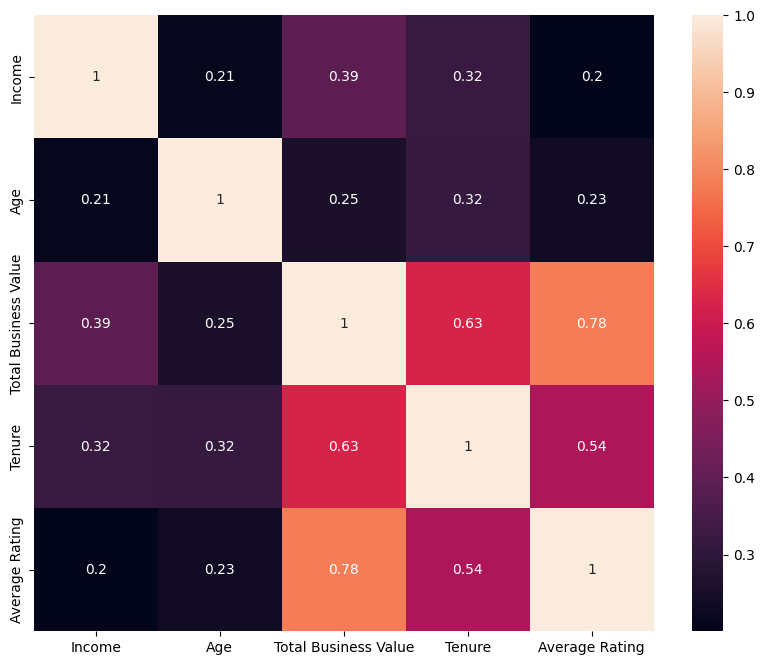

In [ ]:
num_df = df[num_cols]
plt.figure(figsize = (10,8))
sns.heatmap(num_df.corr(), annot = True)

**Observation on Correlation**

* Total Business Value has a strong positive correlation with Average Rating(Average of Quarterly ratings) and a moderately strong positive correlation with Tenure.
* Tenure also has a moderately strong positive correlation with Average Rating.


### **Distributions of Numerical Variables**

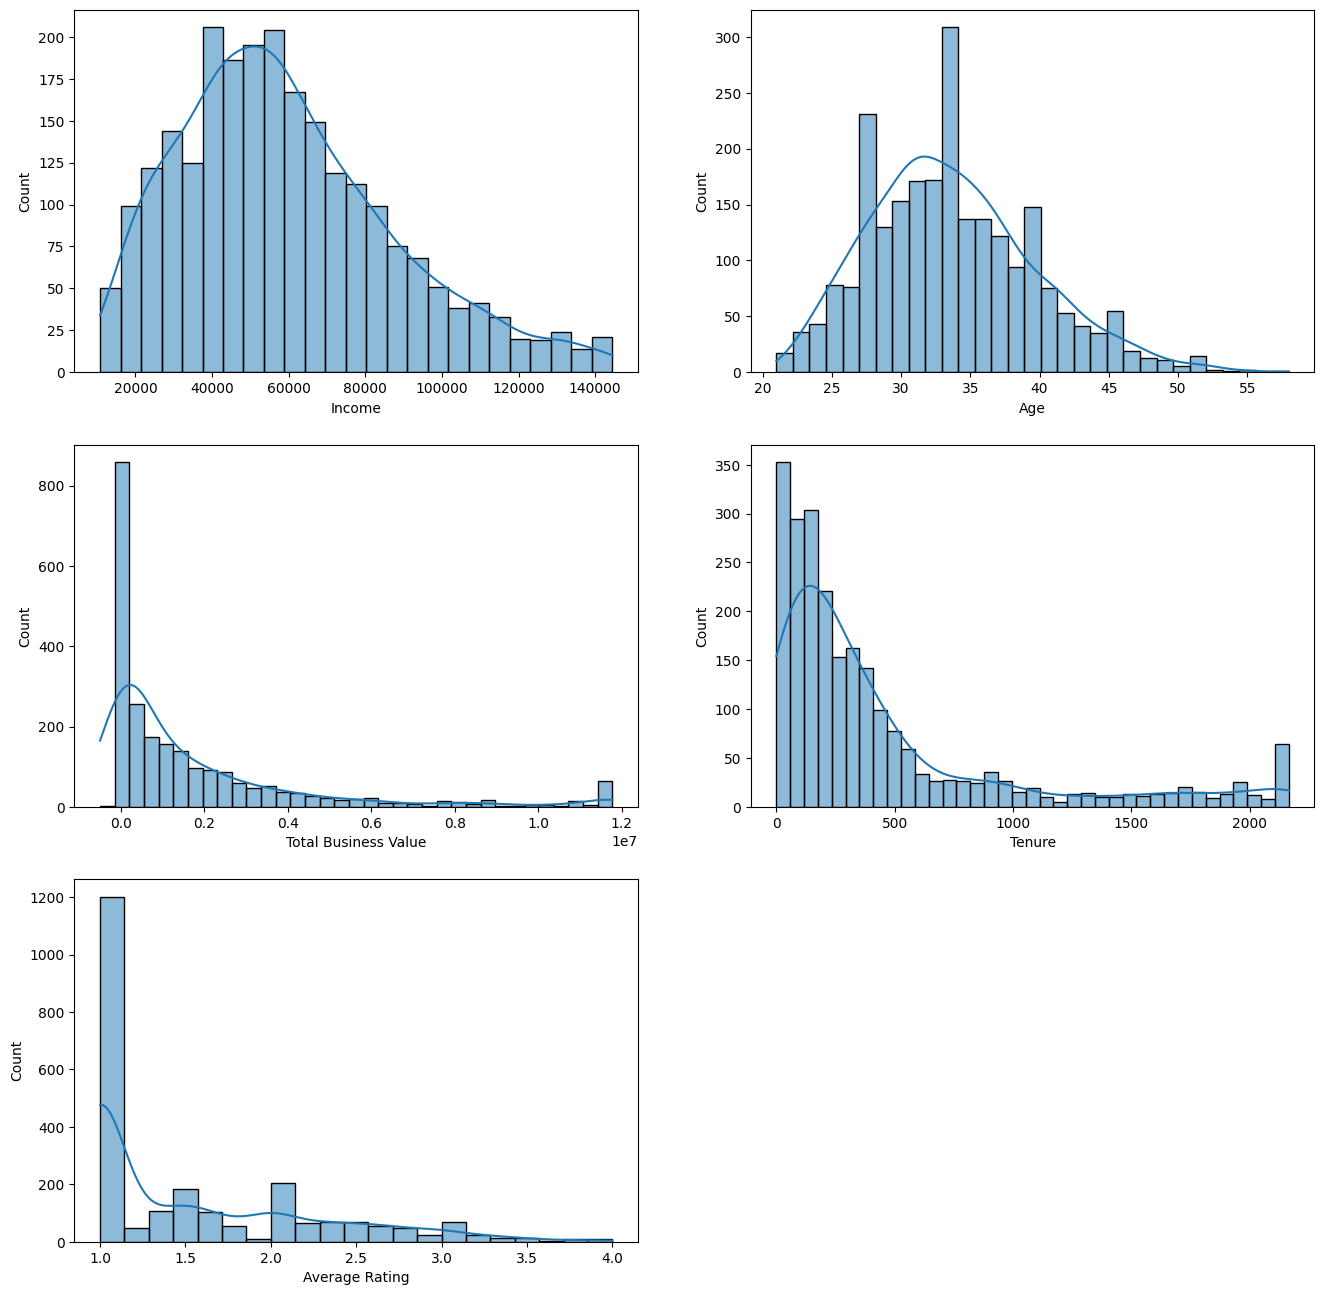

In [ ]:
plt.figure(figsize = (16, 16))
for i, col in enumerate(num_cols):
  plt.subplot(3, 2, i+1)
  sns.histplot(data = df, x = col, kde = True)
plt.show()

####**Observations on Distributions of Numerical Variables**

* Distributions of Income and Age are fairly normal
* Total Business Value and Tenure show a right skewed distribution with majority of the data points concentrated at the lower values and outliers towards higher values.
* Log transformation of Total Business Value and Tenure will normalise the distribution.


##**Multivariate Analysis**

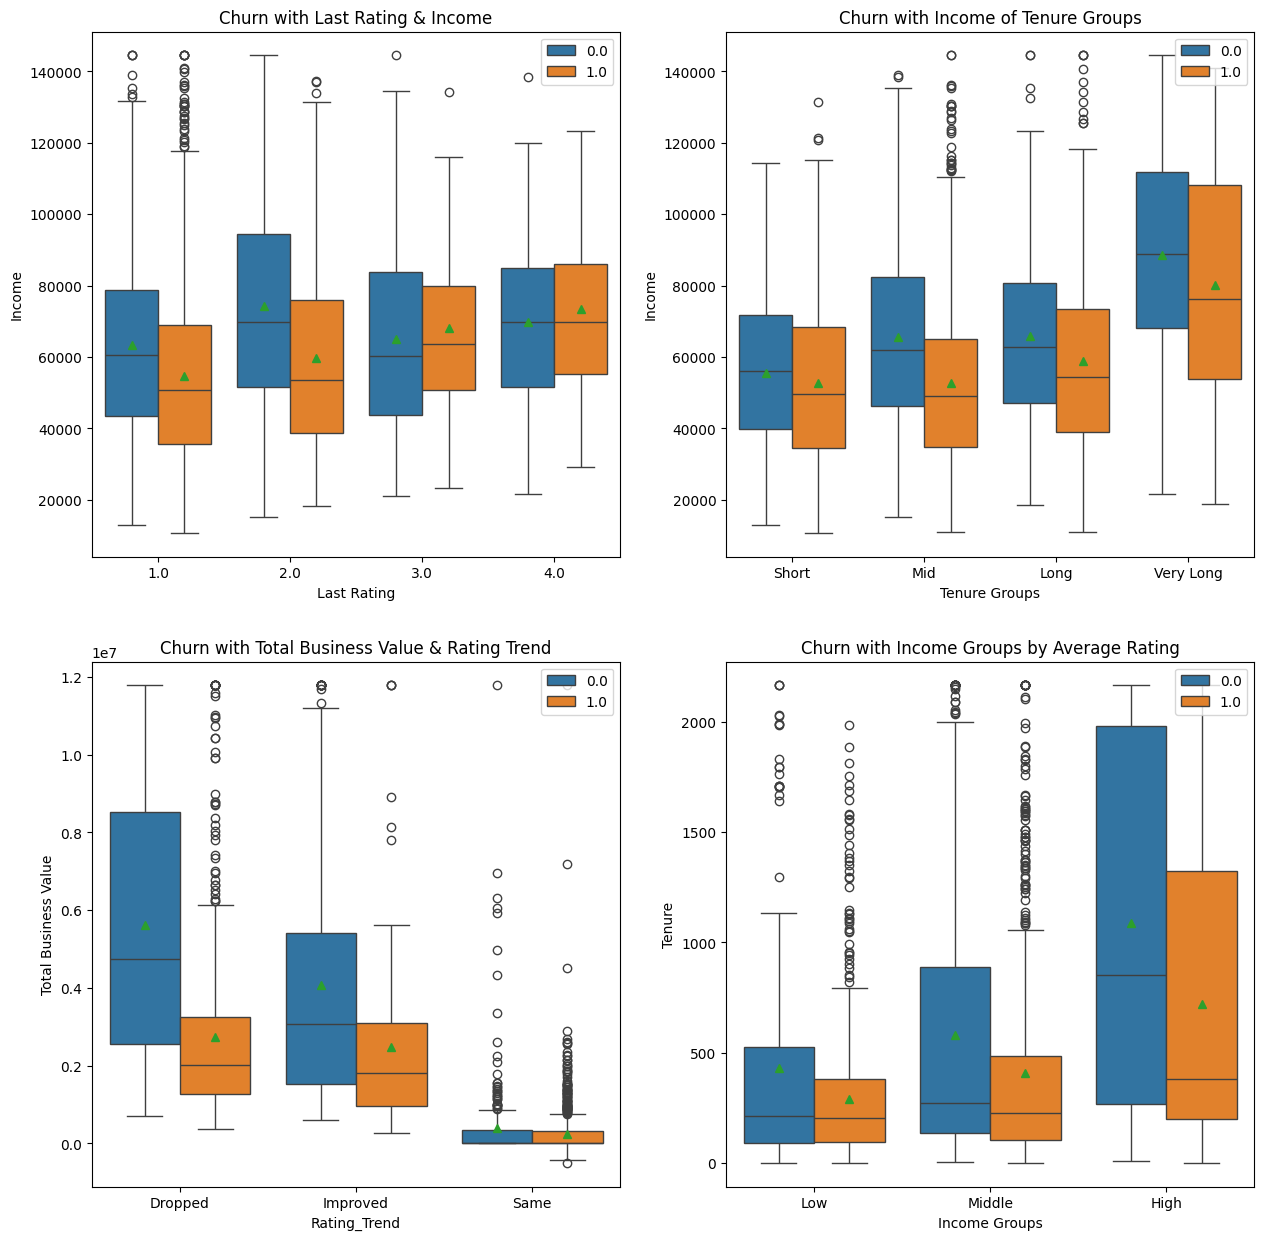

In [ ]:
plt.figure(figsize = (15, 15))

plt.subplot(2, 2, 1)
sns.boxplot(x='Last Rating', y='Income', hue='Churn', data=df, showmeans = True)
plt.title('Churn with Last Rating & Income')
plt.legend(loc='upper right')


plt.subplot(2, 2, 2)
sns.boxplot(x='Tenure Groups', y='Income', hue='Churn', data=df, showmeans = True)
plt.title('Churn with Income of Tenure Groups')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.boxplot(x='Rating_Trend', y='Total Business Value', hue='Churn', data=df, showmeans = True)
plt.title('Churn with Total Business Value & Rating Trend')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
sns.boxplot(x='Income Groups', y='Tenure', hue='Churn', data=df, showmeans = True)
plt.title('Churn with Income Groups by Average Rating')
plt.legend(loc='upper right')


plt.show()

####**Observations**

* Among drivers who lad low last ratings (1 & 2) drivers who quit have lower incomes, whereas among drivers who had higher rating (3 & 4) those who quit had higher mean incomes. This is unusual and should be probed.  

* Across all tenure groups, drivers with lower income are at risk of churning.

* Interestingly the Total Business Value of Drivers whose ratings dropped and have not quit is higher than that of drivers whose rating improved and have not quit.

* Among all Rating Trend groups drivers who had lowers TBV churned. However there are drivers who delivered higher business value even with a rating drop. These are outliers, however, OLA should attempt to retain such drivers and help improve their ratings.

* Drivers with higher income have a higher tenure spread as compared to drivers with lower and middle income indicating a higher income helps retain drivers. The median tenure of high income drivers who have quit is roughly around 400 days. This indicates that a sizeable number of Drivers who make high income quit after completing a year. OLA may want to focus on retaining such driver with special incentives on completing the term.  

In [ ]:
df_timestamp = df.copy()

In [ ]:
#Dropping columns that won't be required for Model building

df.drop(['Dateofjoining', 'LastDate', 'Year', 'Driver_ID', 'LastMonth'], inplace = True, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   2381 non-null   float64 
 1   Gender                2381 non-null   category
 2   City                  2381 non-null   category
 3   Education_Level       2381 non-null   float64 
 4   Income                2381 non-null   float64 
 5   Joining Designation   2381 non-null   float64 
 6   Grade                 2381 non-null   float64 
 7   Total Business Value  2381 non-null   int64   
 8   Churn                 2381 non-null   float64 
 9   Tenure                2381 non-null   float64 
 10  Average Rating        2381 non-null   float64 
 11  Last Rating           2381 non-null   float64 
 12  Rating_Trend          2381 non-null   category
 13  Age Groups            2381 non-null   category
 14  Income Groups         2381 non-null   category
 15  Busi

#**Data Preprocessing: Outlier Removal, Encoding, Data Split, Balancing, Scaling**

## **Handling Outliers**

  * Total Business Value and Tenure Columns show a right skewed distribution with outliers
  * Outlier removal is essential since we will be using Boosting ensembles
  * Removing outliers with transformations to retain information was attempted, however, since Total Business Value and Tenure contain negative and null values log normal and box cox transformation can not be applied directly, and adding constant resulted in distorted transformation. We will eliminate outlier by clipping.



In [ ]:
# Apply IQR method to Total Business Value

Q1_tbv = df['Total Business Value'].quantile(0.25)
Q3_tbv = df['Total Business Value'].quantile(0.75)
IQR_tbv = Q3_tbv - Q1_tbv
lower_bound_tbv = Q1_tbv - 1.5 * IQR_tbv
upper_bound_tbv = Q3_tbv + 1.5 * IQR_tbv
df['TBV_clipped'] = df['Total Business Value'].apply(lambda x: lower_bound_tbv if x < lower_bound_tbv else (upper_bound_tbv if x > upper_bound_tbv else x))

lower_bound_tbv, upper_bound_tbv

(-3516660.0, 5861100.0)

In [ ]:
# Apply IQR method to Tenure

Q1_tenure_normal = df['Tenure'].quantile(0.25)
Q3_tenure_normal = df['Tenure'].quantile(0.75)
IQR_tenure_normal = Q3_tenure_normal - Q1_tenure_normal
lower_bound_tenure_normal = Q1_tenure_normal - 1.5 * IQR_tenure_normal
upper_bound_tenure_normal = Q3_tenure_normal + 1.5 * IQR_tenure_normal
df['Tenure_clipped'] = df['Tenure'].apply(lambda x: lower_bound_tenure_normal if x < lower_bound_tenure_normal else (upper_bound_tenure_normal if x > upper_bound_tenure_normal else x))

lower_bound_tenure_normal, upper_bound_tenure_normal

(-496.5, 1107.5)

<Axes: ylabel='TBV_clipped'>

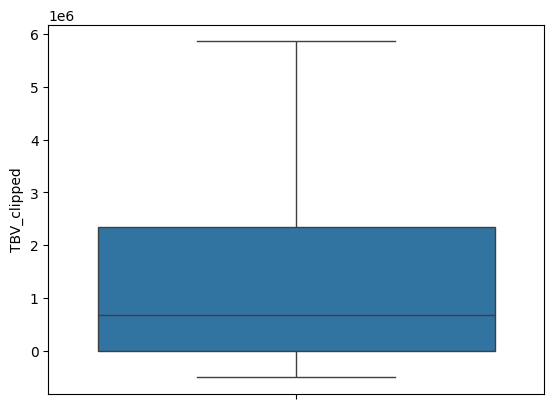

In [ ]:
sns.boxplot(df['TBV_clipped'])

<Axes: ylabel='Tenure_clipped'>

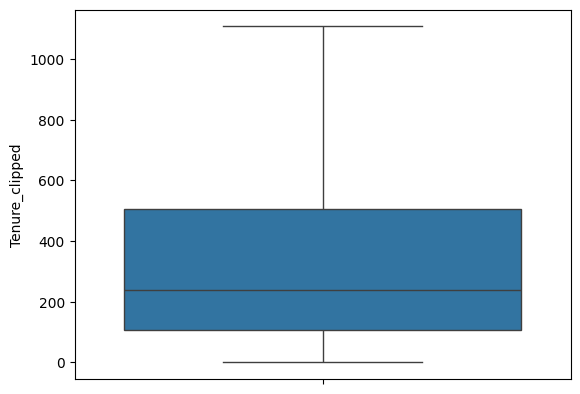

In [ ]:
sns.boxplot(df['Tenure_clipped'])

## **Encoding & Data Split**

In [ ]:
df['Gender'] = df['Gender'].astype('int64')

In [ ]:
df_unencoded = df.copy()

In [ ]:
df = df_unencoded.copy()

In [ ]:
!pip install --upgrade category_encoders
from category_encoders import TargetEncoder
from category_encoders import OneHotEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
df['Tenure Groups'].unique()

['Mid', 'Short', 'Very Long', 'Long']
Categories (4, object): ['Short' < 'Mid' < 'Long' < 'Very Long']

In [ ]:
# Encoding Ordinal Columns manually using map to retain ordinality
# Ordinal Columns : Rating_Trend, Age Groups,	Income Groups, Business Groups, Tenure Groups

df['Rating_Trend'] = df['Rating_Trend'].map({'Dropped':0, 'Same': 1, 'Improved' : 2}).astype('int64')
df['Age Groups'] = df['Age Groups'].map({'Young':0, 'Middle-Aged': 1, 'Senior' : 2}).astype('int64')
df['Income Groups'] = df['Income Groups'].map({'Low':0, 'Middle': 1, 'High' : 2}).astype('int64')
df['Business Groups'] = df['Business Groups'].map({'Negative':0, 'Low': 1, 'Middle' : 2, 'High' : 3}).astype('int64')
df['Tenure Groups'] =  df['Tenure Groups'].map({'Short':0, 'Mid': 1, 'Long' : 2, 'Very Long' : 3}).astype('int64')


**Data will be split before applying TargetEncoder:**

70% of the data will be used for training

15% of the the data will be used for validation and hyperparameter tuning

15% of the data will be used for model testing


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_tr, df_test_val = train_test_split(df, test_size = 0.30, random_state=54)
df_test, df_val = train_test_split(df_test_val, test_size=0.50,random_state=54)

In [ ]:
df_tr.shape, df_test.shape, df_val.shape

((1666, 19), (357, 19), (358, 19))

In [ ]:
#Creating Datasets for Training, Validation and Testing

# Training Data
y_train = df_tr['Churn']
X_train = df_tr.drop('Churn', axis=1)

# Validation Data
y_val = df_val['Churn']
X_val = df_val.drop('Churn', axis=1)

# Test Data
y_test = df_test['Churn']
X_test = df_test.drop('Churn', axis=1)

In [ ]:
X_train.shape, y_train.shape

((1666, 18), (1666,))

In [ ]:
X_val.shape, y_val.shape

((358, 18), (358,))

In [ ]:
X_test.shape, y_test.shape

((357, 18), (357,))

In [ ]:
# Encoding Non-ordinal variable City using TargetEncoder

#Target Encoding 'purpose'

te = TargetEncoder()

#Fit and transform train data
X_train['City'] = te.fit_transform(X_train['City'], y_train)

# Tranform val and test data
X_val['City'] = te.transform(X_val['City'])
X_test['City'] = te.transform(X_test['City'])



In [ ]:
X_train_backup = X_train.copy()
y_train_backup = y_train.copy()

In [ ]:
X_val

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Tenure,Average Rating,Last Rating,Rating_Trend,Age Groups,Income Groups,Business Groups,Tenure Groups,TBV_clipped,Tenure_clipped
911,40.0,0,0.692040,1.0,52480.0,2.0,2.0,0,203.0,1.00,1.0,1,1,1,0,1,0.0,203.0
1603,33.0,0,0.828558,1.0,52471.0,3.0,3.0,3630790,222.0,1.67,2.0,2,0,1,2,1,3630790.0,222.0
712,29.0,0,0.726857,1.0,66179.0,2.0,2.0,3485500,382.0,1.80,1.0,0,0,1,2,1,3485500.0,382.0
903,34.0,0,0.676544,0.0,104966.0,3.0,3.0,0,310.0,1.00,1.0,1,0,2,0,1,0.0,310.0
1295,30.0,1,0.705003,2.0,64606.0,2.0,2.0,1597690,108.0,1.67,1.0,0,0,1,1,1,1597690.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,31.0,0,0.692040,0.0,14113.0,1.0,1.0,1845890,38.0,1.50,1.0,0,0,0,2,0,1845890.0,38.0
1944,31.0,0,0.781109,2.0,51261.0,2.0,2.0,0,137.0,1.00,1.0,1,0,1,0,1,0.0,137.0
311,29.0,0,0.686557,2.0,44630.0,2.0,2.0,0,59.0,1.00,1.0,1,0,0,0,0,0.0,59.0
1896,37.0,1,0.715860,1.0,28216.0,1.0,1.0,1437040,1106.0,2.25,2.0,0,1,0,1,2,1437040.0,1106.0


## **Fixing Data Imbalance with SMOTE**

In [ ]:
y_train.value_counts(normalize = True)

,proportion
Churn,
1.0,0.685474
0.0,0.314526


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Applying SMOTE

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts(normalize = True)

,proportion
Churn,
0.0,0.5
1.0,0.5


In [ ]:
X_train.shape, y_train.shape

((2284, 18), (2284,))

## **Scaling**

In [ ]:
#Backup Data

X_train_unscaled = X_train.copy()
y_train_unscaled = y_train.copy()

X_val_unscaled = X_val.copy()
y_val_unscaled = y_val.copy()

X_test_unscaled = X_test.copy()
y_test_unscaled = y_test.copy()

In [ ]:
X_val_unscaled

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Tenure,Average Rating,Last Rating,Rating_Trend,Age Groups,Income Groups,Business Groups,Tenure Groups,TBV_clipped,Tenure_clipped
911,40.0,0,0.692040,1.0,52480.0,2.0,2.0,0,203.0,1.00,1.0,1,1,1,0,1,0.0,203.0
1603,33.0,0,0.828558,1.0,52471.0,3.0,3.0,3630790,222.0,1.67,2.0,2,0,1,2,1,3630790.0,222.0
712,29.0,0,0.726857,1.0,66179.0,2.0,2.0,3485500,382.0,1.80,1.0,0,0,1,2,1,3485500.0,382.0
903,34.0,0,0.676544,0.0,104966.0,3.0,3.0,0,310.0,1.00,1.0,1,0,2,0,1,0.0,310.0
1295,30.0,1,0.705003,2.0,64606.0,2.0,2.0,1597690,108.0,1.67,1.0,0,0,1,1,1,1597690.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,31.0,0,0.692040,0.0,14113.0,1.0,1.0,1845890,38.0,1.50,1.0,0,0,0,2,0,1845890.0,38.0
1944,31.0,0,0.781109,2.0,51261.0,2.0,2.0,0,137.0,1.00,1.0,1,0,1,0,1,0.0,137.0
311,29.0,0,0.686557,2.0,44630.0,2.0,2.0,0,59.0,1.00,1.0,1,0,0,0,0,0.0,59.0
1896,37.0,1,0.715860,1.0,28216.0,1.0,1.0,1437040,1106.0,2.25,2.0,0,1,0,1,2,1437040.0,1106.0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


In [ ]:
X_val

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Tenure,Average Rating,Last Rating,Rating_Trend,Age Groups,Income Groups,Business Groups,Tenure Groups,TBV_clipped,Tenure_clipped
0,1.067569,-0.728582,0.152662,-0.014120,-0.344843,0.172220,-0.201953,-0.729627,-0.519146,-0.870290,-0.672866,0.197869,1.436552,0.504547,-1.242014,-0.139591,-0.893470,-0.547757
1,-0.155002,-0.728582,1.827222,-0.014120,-0.345164,1.395545,0.888559,0.458161,-0.486149,0.012477,0.411034,1.679619,-0.658649,0.504547,0.759934,-0.139591,0.895231,-0.495664
2,-0.853614,-0.728582,0.579731,-0.014120,0.143222,0.172220,-0.201953,0.410630,-0.208287,0.183761,-0.672866,-1.283880,-0.658649,0.504547,0.759934,-0.139591,0.823654,-0.056984
3,0.019651,-0.728582,-0.037414,-1.287271,1.525116,1.395545,0.888559,-0.729627,-0.333325,-0.870290,-0.672866,0.197869,-0.658649,2.080998,-1.242014,-0.139591,-0.893470,-0.254390
4,-0.678961,1.372530,0.311664,1.259030,0.087179,0.172220,-0.201953,-0.206954,-0.684127,0.012477,-0.672866,-1.283880,-0.658649,0.504547,-0.241040,-0.139591,-0.106371,-0.808222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.504308,-0.728582,0.152662,-1.287271,-1.711774,-1.051105,-1.292466,-0.125757,-0.805691,-0.211508,-0.672866,-1.283880,-0.658649,-1.071904,0.759934,-1.246627,0.015904,-1.000145
354,-0.504308,-0.728582,1.245206,1.259030,-0.388274,0.172220,-0.201953,-0.729627,-0.633764,-0.870290,-0.672866,0.197869,-0.658649,0.504547,-1.242014,-0.139591,-0.893470,-0.728712
355,-0.853614,-0.728582,0.085410,1.259030,-0.624521,0.172220,-0.201953,-0.729627,-0.769222,-0.870290,-0.672866,0.197869,-0.658649,-1.071904,-1.242014,-1.246627,-0.893470,-0.942568
356,0.543610,1.372530,0.444848,-0.014120,-1.209316,-1.051105,-1.292466,-0.259509,1.049041,0.776664,0.411034,-1.283880,1.436552,-1.071904,-0.241040,0.967445,-0.185515,1.928039


# **Preparing Datasets:**

To understand how Bagging (RandomForestClassifier) and Boosting (GradientBoostingClassifiers) Algorithms perform with Binned and Raw Numerical  we will create separate datasets with Binned and Raw Numerical data.

* The Binned dataset will exclude numerical columns that have been binned
* The numerical dataset will exclude binned columns
* 'Total Business Value' and 'Tenure' will be dropped since they contain outliers. The clipped data is stored in 'TBV_clipped' and'Tenure_clipped.


In [ ]:
X_train.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value', 'Tenure',
       'Average Rating', 'Last Rating', 'Rating_Trend', 'Age Groups',
       'Income Groups', 'Business Groups', 'Tenure Groups', 'TBV_clipped',
       'Tenure_clipped'],
      dtype='object')

In [ ]:
drop_num = ['Age', 'Income', 'Total Business Value', 'Tenure', 'TBV_clipped','Tenure_clipped']
drop_bins = ['Age Groups','Income Groups', 'Business Groups', 'Tenure Groups', 'Total Business Value', 'Tenure']

In [ ]:
# Binned Dataset

X_train_bins = X_train.drop(drop_num, axis = 1)
X_val_bins = X_val.drop(drop_num, axis = 1)
X_test_bins = X_test.drop(drop_num, axis = 1)


In [ ]:
# Raw Numericals Dataset

X_train_num = X_train.drop(drop_bins, axis = 1)
X_val_num = X_val.drop(drop_bins, axis = 1)
X_test_num = X_test.drop(drop_bins, axis = 1)


# **Evaluation Metrics:**

* **Key metric for Driver Retention: Recall**

  The objective is to identify drivers who are likely to quit (i.e. positive case) We want to avoid missclassifying those who are likely to quit as negative. We thus want to minimize False Negative predictions and maximize True Positive. Recall is a metric which tells us how the good the model is at identifying the positive cases (and avoiding missclassifying postives as negatives.


* Other Metrics:
  * Accuracy
  * Precision
  * F1 Score
  * ROC-AUC
  * Precision Recall - AUC



# **Importing Libraries and Classes for Model Building & Evaluation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report, make_scorer, roc_auc_score)

# **Model Building : Bagging Ensemble**

In [ ]:
# List of scoring metrics
scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']

In [ ]:
# Parameters for Grid Search/ Random Search

params = {
          'n_estimators' : [200,250,300],
          'max_depth' : [4, 6, 10],
          'max_features': [9, 10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False]
         }

In [ ]:
grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'recall',
                    cv = 5,
                    n_jobs=-1
                    )

## **Training Model using Dataset with Raw Numericals**

In [ ]:

grid.fit(X_train_num, y_train)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

KeyboardInterrupt: 

In [ ]:
rfc1 = RandomForestClassifier(random_state=11, bootstrap=False, criterion='gini',
                              max_depth = 4, max_features=9, n_estimators = 200)

kfold = StratifiedKFold(n_splits = 8)
cv_rfc1_results = cross_validate(rfc1, X_train_num, y_train, cv=kfold, scoring= scores, return_train_score=True)

In [ ]:
for metric in scores:
    print(f"K-Fold {metric} Mean:")
    print(f"  Train: {cv_rfc1_results[f'train_{metric}'].mean()*100:.3f}")
    print(f"  Validation: {cv_rfc1_results[f'test_{metric}'].mean()*100:.3f}")

K-Fold accuracy Mean:
  Train: 80.842
  Validation: 80.002
K-Fold precision Mean:
  Train: 75.188
  Validation: 75.316
K-Fold recall Mean:
  Train: 92.082
  Validation: 91.159
K-Fold f1 Mean:
  Train: 82.780
  Validation: 82.267
K-Fold roc_auc Mean:
  Train: 91.165
  Validation: 89.404
K-Fold average_precision Mean:
  Train: 90.064
  Validation: 88.203


In [ ]:
rfc1.fit(X_train_num, y_train)

RandomForestClassifier(bootstrap=False, max_depth=4, max_features=9,
                       n_estimators=200, random_state=11)

###**Checking Feature Importance**

In [ ]:
feature_imp_num = pd.DataFrame({"Features" : X_train_num.columns, "Coefficients": pd.DataFrame(list(rfc1.feature_importances_))[0] })
feature_imp_num.sort_values('Coefficients', ascending = False)

,Features,Coefficients
8,Last Rating,0.592783
5,Joining Designation,0.146239
6,Grade,0.082415
7,Average Rating,0.071225
11,Tenure_clipped,0.064874
10,TBV_clipped,0.014795
9,Rating_Trend,0.011979
2,City,0.010972
0,Age,0.002315
4,Income,0.002127


###**Using Model (rfc1) to Predict and Evaluate Model with Training, Validation and Test data(Raw Numerical)**

In [ ]:
ypred_train = rfc1.predict(X_train_num)
ypred_val = rfc1.predict(X_val_num)
ypred_test = rfc1.predict(X_test_num)

In [ ]:
ypred_train_prob = rfc1.predict_proba(X_train_num)[:, 1]
ypred_val_prob = rfc1.predict_proba(X_val_num)[:, 1]
ypred_test_probl = rfc1.predict_proba(X_test_num)[:, 1]

In [ ]:
print('Training Accuracy :', round(rfc1.score(X_train_num,y_train),2))
print('Training F1 Score:', round(f1_score(y_train,ypred_train),2))
print('Training Recall Score:',round(recall_score(y_train,ypred_train),2))
print('Training Precision Score:', round(precision_score(y_train,ypred_train),2))
print('Training ROC-AUC Score:', round(roc_auc_score(y_train, ypred_train_prob), 2))
print('Training Precision-Recall AUC:', round(average_precision_score(y_train, ypred_train_prob), 2))

Training Accuracy : 0.81
Training F1 Score: 0.83
Training Recall Score: 0.93
Training Precision Score: 0.75
Training ROC-AUC Score: 0.91
Training Precision-Recall AUC: 0.9


In [ ]:
print('Validation Accuracy :', round(rfc1.score(X_val_num,y_val),2))
print('Validation F1 Score:', round(f1_score(y_val,ypred_val),2))
print('Validation Recall Score:',round(recall_score(y_val,ypred_val),2))
print('Validation Precision Score:', round(precision_score(y_val,ypred_val),2))
print('Validation ROC-AUC Score:', round(roc_auc_score(y_val, ypred_val_prob), 2))
print('Validation Precision-Recall AUC:', round(average_precision_score(y_val, ypred_val_prob), 2))

Validation Accuracy : 0.8
Validation F1 Score: 0.86
Validation Recall Score: 0.95
Validation Precision Score: 0.79
Validation ROC-AUC Score: 0.81
Validation Precision-Recall AUC: 0.87


In [ ]:
print('Test Accuracy :', round(rfc1.score(X_test_num,y_test),2))
print('Test F1 Score:', round(f1_score(y_test,ypred_test),2))
print('Test Recall Score:',round(recall_score(y_test,ypred_test),2))
print('Test Precision Score:', round(precision_score(y_test,ypred_test),2))
print('Test ROC-AUC Score:', round(roc_auc_score(y_test, ypred_test_probl), 2))
print('Test Precision-Recall AUC:', round(average_precision_score(y_test, ypred_test_probl), 2))

Test Accuracy : 0.8
Test F1 Score: 0.86
Test Recall Score: 0.94
Test Precision Score: 0.79
Test ROC-AUC Score: 0.84
Test Precision-Recall AUC: 0.89


## **Training Model using Dataset on Binned Data**

In [ ]:

grid.fit(X_train_bins, y_train)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)


KeyboardInterrupt: 

In [ ]:
rfc2 = RandomForestClassifier(random_state=11, bootstrap=False, criterion='gini',
                              max_depth=4, max_features=9, n_estimators=200)

kfold = StratifiedKFold(n_splits=10)
cv_rfc2_results = cross_validate(rfc2, X_train_bins, y_train, cv=kfold, scoring= scores, return_train_score=True)

In [ ]:
for metric in scores:
    print(f"K-Fold {metric} Mean:")
    print(f"  Train: {cv_rfc2_results[f'train_{metric}'].mean()*100:.3f}")
    print(f"  Validation: {cv_rfc2_results[f'test_{metric}'].mean()*100:.3f}")

K-Fold accuracy Mean:
  Train: 81.456
  Validation: 80.574
K-Fold precision Mean:
  Train: 76.076
  Validation: 75.757
K-Fold recall Mean:
  Train: 91.866
  Validation: 91.944
K-Fold f1 Mean:
  Train: 83.215
  Validation: 82.858
K-Fold roc_auc Mean:
  Train: 90.848
  Validation: 88.948
K-Fold average_precision Mean:
  Train: 89.499
  Validation: 87.958


In [ ]:
rfc2.fit(X_train_bins, y_train)

RandomForestClassifier(bootstrap=False, max_depth=4, max_features=9,
                       n_estimators=200, random_state=11)

In [ ]:
feature_imp_bins = pd.DataFrame({"Features" : X_train_bins.columns, "Coefficients": pd.DataFrame(list(rfc2.feature_importances_))[0] })
feature_imp_bins.sort_values('Coefficients', ascending = False)

,Features,Coefficients
6,Last Rating,0.598389
3,Joining Designation,0.137907
4,Grade,0.072945
5,Average Rating,0.069734
11,Tenure Groups,0.062141
1,City,0.025475
2,Education_Level,0.014285
7,Rating_Trend,0.012025
10,Business Groups,0.005755
9,Income Groups,0.001179


###**Using Model (rfc2) to Predict with Validation and Test data (Binned)**

In [ ]:
ypred_train = rfc2.predict(X_train_bins)
ypred_val = rfc2.predict(X_val_bins)
ypred_test = rfc2.predict(X_test_bins)

In [ ]:
ypred_train_prob = rfc2.predict_proba(X_train_bins)[:, 1]
ypred_val_prob = rfc2.predict_proba(X_val_bins)[:, 1]
ypred_test_probl = rfc2.predict_proba(X_test_bins)[:, 1]

In [ ]:
print('Training Accuracy :', round(rfc2.score(X_train_bins,y_train),2))
print('Training F1 Score:', round(f1_score(y_train,ypred_train),2))
print('Training Recall Score:',round(recall_score(y_train,ypred_train),2))
print('Training Precision Score:', round(precision_score(y_train,ypred_train),2))
print('Training ROC-AUC Score:', round(roc_auc_score(y_train, ypred_train_prob), 2))
print('Training Precision-Recall AUC:', round(average_precision_score(y_train, ypred_train_prob), 2))

Training Accuracy : 0.81
Training F1 Score: 0.83
Training Recall Score: 0.92
Training Precision Score: 0.76
Training ROC-AUC Score: 0.91
Training Precision-Recall AUC: 0.9


In [ ]:
print('Validation Accuracy :', round(rfc2.score(X_val_bins,y_val),2))
print('Validation F1 Score:', round(f1_score(y_val,ypred_val),2))
print('Validation Recall Score:',round(recall_score(y_val,ypred_val),2))
print('Validation Precision Score:', round(precision_score(y_val,ypred_val),2))
print('Validation ROC-AUC Score:', round(roc_auc_score(y_val, ypred_val_prob), 2))
print('Validation Precision-Recall AUC:', round(average_precision_score(y_val, ypred_val_prob), 2))

Validation Accuracy : 0.81
Validation F1 Score: 0.87
Validation Recall Score: 0.95
Validation Precision Score: 0.8
Validation ROC-AUC Score: 0.79
Validation Precision-Recall AUC: 0.88


In [ ]:
print('Test Accuracy :', round(rfc2.score(X_test_bins,y_test),2))
print('Test F1 Score:', round(f1_score(y_test,ypred_test),2))
print('Test Recall Score:',round(recall_score(y_test,ypred_test),2))
print('Test Precision Score:', round(precision_score(y_test,ypred_test),2))
print('Test ROC-AUC Score:', round(roc_auc_score(y_test, ypred_test_probl), 2))
print('Test Precision-Recall AUC:', round(average_precision_score(y_test, ypred_test_probl), 2))

Test Accuracy : 0.79
Test F1 Score: 0.85
Test Recall Score: 0.92
Test Precision Score: 0.79
Test ROC-AUC Score: 0.82
Test Precision-Recall AUC: 0.88


## **Bagging Ensemble Model Report**

* Two Random Forest models (rfc1 and rfc2) were used to predict driver churn.

* Model rfc1 used raw numerical data, while rfc2 used binned versions of the same features to test if binning improved performance.

* Both models were tuned for optimal performance using parameters like tree depth, estimators, and maximum features, finalized through GridSearch. The same tuned parameter values were used for both models for consistency.

* Both models performed well on training data, with high Recall scores above 0.92, showing they very effective when it comes to identifying churn cases. The ROC-AUC of 0.91 indicates strong separation between churn and non-churn predictions.

* Validation & Test Performance:
  * rfc1 achieved a validation accuracy of 0.80 and test accuracy of 0.80, with high recall (0.94) showing its ability to capture churn cases. The test ROC-AUC of 0.84 indicates good predictive capability.

  * model rfc2 achieved slightly higher validation accuracy of 0.81 but slightly lower test accuracy of 0.79. The ROC-AUC of 0.82 on the test data is comparable to rfc1.

  * Both models achieved a very good recall score (between 92 - 95%) which indicated that model is able to correctly identify 94% of the positive cases correctly in the test and validation.

  * The models have a Precision-Recall AUC score of 0.88 on Test and validation data indicating that the model is effective at maintaining high recall (identify most positive cases) while also minimizing false positives.

* Feature Importance:
  * Last Rating was the most important feature for both models, contributing about 60% of the importance in each, suggesting recent ratings are crucial to churn prediction.
  * Joining Designation, Grade and average rating were other important features
  * Factors like Income and Gender had minimal impact.

* Prediction - Precision & Recall:
  * Both models showed higher recall than precision across training, validation, and test sets. This means they are more likely to correctly identify churn than to avoid false positives, which aligns with the objective of the task.

* Comparison:
  * rfc2 (using binned data) didn't show clear improvement over rfc1 (raw data). Both models performed similarly on key metrics, suggesting binning did not significantly affect the model's ability to predict churn.
  * Both models are suitable for predicting driver churn, but since binning didn't yield a notable improvement, using rfc1 (with raw data) may be simpler and equally effective.

* Improvements:
  * There's scope to improve the models by dropping features like Gender and introducing more meaningful features. Further tuning of parameters could also help improve the score.





# **Model Building : Boosting with GradientBoostingClassifier & LightGBM**

In [ ]:
# List of scoring metrics
scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']

In [ ]:
# Parameters for Grid Search/ Random Search

params = {
          'n_estimators' : [200,300,400],
          'max_depth' : [4, 6, 8, 10],
          'learning_rate': [0.1, 0.2, 0.3]
         }

In [ ]:
grid = GridSearchCV(estimator = GradientBoostingClassifier(loss = 'log_loss'),
                    param_grid = params,
                    scoring = 'recall',
                    cv = 5,
                    n_jobs=-1
                    )

In [ ]:

random = RandomizedSearchCV(estimator = GradientBoostingClassifier(loss = 'log_loss'),
                    param_distributions = params,
                    scoring = 'recall',
                    cv = 5,
                    n_jobs=-1,
                    n_iter = 25
                    )

## **Training Model using Dataset with Raw Numericals**

In [ ]:
grid.fit(X_train_num, y_train)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)


KeyboardInterrupt: 

In [ ]:
gbc1 = GradientBoostingClassifier(n_estimators=200, max_depth = 5, loss = 'log_loss', learning_rate = 0.1, validation_fraction=0.1, n_iter_no_change=10)

#Note: Parameters were changed as model over fitting. Accuracy score of model on Training was 1.0 and ~80 for val and test data.
# This however did not have any significant impact on the perfect Accuracy Score.

gbc1.fit(X_train_num, y_train)



GradientBoostingClassifier(max_depth=5, n_estimators=200, n_iter_no_change=10)

###**Checking Feature Importance**

In [ ]:
feature_imp_num = pd.DataFrame({"Features" : X_train_num.columns, "Coefficients": pd.DataFrame(list(gbc1.feature_importances_))[0] })
feature_imp_num.sort_values('Coefficients', ascending = False)

,Features,Coefficients
8,Last Rating,0.417394
11,Tenure_clipped,0.137578
5,Joining Designation,0.128756
10,TBV_clipped,0.064158
2,City,0.060645
4,Income,0.053202
6,Grade,0.051593
0,Age,0.032171
3,Education_Level,0.026966
7,Average Rating,0.014129


###**Using Model (gbc1) to Predict and Evaluate Model with Training, Validation and Test data(Raw Numerical)**

In [ ]:
ypred_train = gbc1.predict(X_train_num)
ypred_val = gbc1.predict(X_val_num)
ypred_test = gbc1.predict(X_test_num)

In [ ]:
ypred_train_prob = gbc1.predict_proba(X_train_num)[:, 1]
ypred_val_prob = gbc1.predict_proba(X_val_num)[:, 1]
ypred_test_probl = gbc1.predict_proba(X_test_num)[:, 1]

In [ ]:
print('Training Accuracy :', round(gbc1.score(X_train_num,ypred_train),2))
print('Training F1 Score:', round(f1_score(y_train,ypred_train),2))
print('Training Recall Score:',round(recall_score(y_train,ypred_train),2))
print('Training Precision Score:', round(precision_score(y_train,ypred_train),2))
print('Training ROC-AUC Score:', round(roc_auc_score(y_train, ypred_train_prob), 2))
print('Training Precision-Recall AUC:', round(average_precision_score(y_train, ypred_train_prob), 2))

Training Accuracy : 1.0
Training F1 Score: 0.95
Training Recall Score: 0.98
Training Precision Score: 0.93
Training ROC-AUC Score: 0.99
Training Precision-Recall AUC: 0.99


In [ ]:
print('Validation Accuracy :', round(gbc1.score(X_val_num,y_val),2))
print('Validation F1 Score:', round(f1_score(y_val,ypred_val),2))
print('Validation Recall Score:',round(recall_score(y_val,ypred_val),2))
print('Validation Precision Score:', round(precision_score(y_val,ypred_val),2))
print('Validation ROC-AUC Score:', round(roc_auc_score(y_val, ypred_val_prob), 2))
print('Validation Precision-Recall AUC:', round(average_precision_score(y_val, ypred_val_prob), 2))

Validation Accuracy : 0.78
Validation F1 Score: 0.85
Validation Recall Score: 0.87
Validation Precision Score: 0.82
Validation ROC-AUC Score: 0.84
Validation Precision-Recall AUC: 0.91


In [ ]:
print('Test Accuracy :', round(gbc1.score(X_test_num,y_test),2))
print('Test F1 Score:', round(f1_score(y_test,ypred_test),2))
print('Test Recall Score:',round(recall_score(y_test,ypred_test),2))
print('Test Precision Score:', round(precision_score(y_test,ypred_test),2))
print('Test ROC-AUC Score:', round(roc_auc_score(y_test, ypred_test_probl), 2))
print('Test Precision-Recall AUC:', round(average_precision_score(y_test, ypred_test_probl), 2))

Test Accuracy : 0.78
Test F1 Score: 0.84
Test Recall Score: 0.88
Test Precision Score: 0.81
Test ROC-AUC Score: 0.84
Test Precision-Recall AUC: 0.91


## **Training LightGBM Model using Binned Dataset**

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_clf = lgb.LGBMClassifier( objective='binary', num_classes=1 )

In [ ]:
lgb_clf.fit(X_train_bins, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1142, number of negative: 1142
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 2284, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(num_classes=1, objective='binary')

In [ ]:
ypred_train = lgb_clf.predict(X_train_bins)
ypred_train_prob = lgb_clf.predict_proba(X_train_bins)[:, 1]

In [ ]:
print('Training Accuracy :', round(lgb_clf.score(X_train_bins,y_train),2))
print('Training F1 Score:', round(f1_score(y_train,ypred_train),2))
print('Training Recall Score:',round(recall_score(y_train,ypred_train),2))
print('Training Precision Score:', round(precision_score(y_train,ypred_train),2))
print('Training ROC-AUC Score:', round(roc_auc_score(y_train, ypred_train_prob), 2))
print('Training Precision-Recall AUC:', round(average_precision_score(y_train, ypred_train_prob), 2))

Training Accuracy : 0.93
Training F1 Score: 0.94
Training Recall Score: 0.98
Training Precision Score: 0.9
Training ROC-AUC Score: 0.99
Training Precision-Recall AUC: 0.99


In [ ]:
feature_imp_bins = pd.DataFrame({"Features" : X_train_num.columns, "Coefficients": pd.DataFrame(list(lgb_clf.feature_importances_))[0] })
feature_imp_bins.sort_values('Coefficients', ascending = False)

,Features,Coefficients
1,Gender,880
5,Joining Designation,415
2,City,311
3,Education_Level,240
6,Grade,203
4,Income,175
11,Tenure_clipped,167
9,Rating_Trend,146
10,TBV_clipped,143
0,Age,120


###**Using Model (lgb_clf) to Predict and Evaluate Model with Validation and Test data(Binned Numerical)**

In [ ]:
ypred_val = lgb_clf.predict(X_val_num)
ypred_test = lgb_clf.predict(X_test_num)

In [ ]:
ypred_val_prob = lgb_clf.predict_proba(X_val_num)[:, 1]
ypred_test_probl = lgb_clf.predict_proba(X_test_num)[:, 1]

In [ ]:
print('Validation Accuracy :', round(lgb_clf.score(X_val_num,y_val),2))
print('Validation F1 Score:', round(f1_score(y_val,ypred_val),2))
print('Validation Recall Score:',round(recall_score(y_val,ypred_val),2))
print('Validation Precision Score:', round(precision_score(y_val,ypred_val),2))
print('Validation ROC-AUC Score:', round(roc_auc_score(y_val, ypred_val_prob), 2))
print('Validation Precision-Recall AUC:', round(average_precision_score(y_val, ypred_val_prob), 2))

Validation Accuracy : 0.36
Validation F1 Score: 0.16
Validation Recall Score: 0.09
Validation Precision Score: 0.72
Validation ROC-AUC Score: 0.49
Validation Precision-Recall AUC: 0.68


In [ ]:
print('Test Accuracy :', round(lgb_clf.score(X_test_num,y_test),2))
print('Test F1 Score:', round(f1_score(y_test,ypred_test),2))
print('Test Recall Score:',round(recall_score(y_test,ypred_test),2))
print('Test Precision Score:', round(precision_score(y_test,ypred_test),2))
print('Test ROC-AUC Score:', round(roc_auc_score(y_test, ypred_test_probl), 2))
print('Test Precision-Recall AUC:', round(average_precision_score(y_test, ypred_test_probl), 2))

Test Accuracy : 0.35
Test F1 Score: 0.11
Test Recall Score: 0.06
Test Precision Score: 0.52
Test ROC-AUC Score: 0.43
Test Precision-Recall AUC: 0.6


## **Boosting Ensemble Report**

* We built two boosting ensemble models: gbc1, a Gradient Boosting Classifier using raw numerical data, and lgb_clf, a LightGBM Classifier using binned features to test the performance of LightGBM Classifiers with the data.

* GridSearch was applied to the GBC model for hyperparameter tuning to optimize performance, adjusting key settings like n_estimators and max_depth.

* No hyperparameter tuning was applied to LightGBM Classifiers.

* Training Performance:
  * The GBC model performed perfectly on training data, with a training accuracy of 1.0 and high scores across recall (0.98), precision (0.93), and ROC-AUC (0.99), suggesting overfitting.

  * The LightGBM model performed extremely well on the training data with a training Accuracy of 0.93, Recall score of 0.98, Precision score of 0.9, and ROC-AUC and Precision-Recall AUC of 0.99.

* Validation & Test Performance:
  * The GBC model performed better on validation (accuracy: 0.78, Recall: 0.87 , F1: 0.85, ROC-AUC: 0.84, Precision Recal AUC : 91) and test sets (accuracy: 0.78, Recall: 0.88, F1: 0.84, ROC-AUC: 0.84, Precision Recal AUC : 91), indicating that the model generalized well and is effective for churn prediction.

  * The LightGBM model significantly underperformed on all metrics for validation and test sets suggesting the LightGBM model struggled without tuning and may not be suitable for the current dataset.

* Feature Importance:
  * GBC: "Last Rating" was the most important feature (41%), followed by "Tenure" and "Joining Designation." This indicates that recent ratings and Tenure are strong predictors of churn.
  * LightGBM: Interestingly, "Gender" was incorrectly identified as the most important feature (due to potential data issues), affecting its performance. Dropping the feature may improve model performance.

* The lack of hyperparameter tuning in LightGBM may have resulted in poor generalization to validation and test data. Moreover the binned data may not have been suitable for the model since it's gradient based.

* Feature selection - dropping less impactful features, and experimenting with deeper hyperparameter tuning to avoid overfitting seen in the GBC model.
  

* With a high Recall, ROC-AUC and Precision Recal AUC score we can say the GBC model can be relied on for churn prediction.




# **Questions**:

* **How does the gap in precision and recall affect Ola's relationship with its
drivers and customers?**

A gap in precision and recall implies that the model is good at identifying drivers who will churn (high recall), it also incorrectly flags drivers who won't churn (lower precision).

False positives may not adversely affect OLA apart from resources being spent on unnecessary interventions for drivers who are not planning to leave. It's far more important to identify and retain drivers who are at risk of churning.




---



---



# **Key Business Insights & Recommendations**

## **Key Observations**

* Last Rating is a Strong Predictor of Churn: Drivers who quit had low last ratings (1 and 2) suggesting that drivers with lower ratings are significantly more likely to churn.

* Drivers who maintain the same or declining ratings are more prone to leave compared to those with improving ratings.

* Income and Tenure Impact Churn: Drivers with lower incomes and shorter tenures are more likely to churn. Notably, even drivers with high ratings but low income display a higher churn risk.


* Rating Trend Matters: Drivers who experience a decline in ratings are more likely to churn.

* Drivers joining at designations 1 and 2 are more likely to churn compared to those who joined at designations 3 and 4.

* While there is some variation in churn based on grade and joining designation, these factors are less significant than last rating, income, and tenure.

* Cities like C13, C17, and C23 have higher attrition rates than others. Conversely, cities like C29, C19, and C16 show lower churn.

* Genders, Education Level and Age Groups have little or no impact of churn.


## **Recommendations**


* Identify drivers who are at high risk of churning based on factors like low ratings, low income, or short tenure.

* Attrition is extremely high among drivers with poor ratings, especiall among those who have not been able to improve their ratings or whose rating have dropped. Implement programs to help drivers improve their ratings, such as training, mentorship, or performance feedback.

* Consider incentives for drivers who improve their ratings (if not already).

* Focus on improving ratings and retaining drivers who have delivered high Total Business Value. Proactively reach out to these drivers and offer support or incentives to retain them.

* For drivers joining at lower designations, establish clear pathways for career progression and set milestones for designation upgrades based on performance and tenure.

* Encouraging newer drivers to interact with drivers who have served for longer periods through training, mentoring programs may encourage drivers to stay for longer.

* Offer incentives for drivers to stay with OLA for longer periods, such as loyalty bonuses or better Grading.

* Gender, Education Level and Age Groups have little or no impact of churn. Efforts to retain drivers based on these factors may not yield results.

* Focus on implementing programs effectively in high attrition like C13, C17, and C23.


#